In [1]:
import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from bs_fdbck.constants import path_extract_latlon_outdata
from dask.diagnostics import ProgressBar
import seaborn as sns
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from bs_fdbck.util.BSOA_datamanip import compute_total_tau, broadcase_station_data, change_units_and_compute_vars, \
    get_dic_df_mod

In [4]:
season = 'WET_early'

In [5]:
def make_fn(case, v_x, v_y, comment='', relplot = False, distplot=False):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'cloud_props_ATTO_{season}_{comment}_{case}_{_x}_{_y}.png'
    if relplot:
        return plot_path_relplot/f
    if distplot:
        return plot_path_distplot/f

    return plot_path /f




plot_path = Path('Plots')
plot_path.mkdir(parents=True, exist_ok=True) 

plot_path_distplot = plot_path/'dist_plot'
plot_path_distplot.mkdir(parents=True, exist_ok=True) 

plot_path_relplot = plot_path/'rel_plot'
plot_path_relplot.mkdir(parents=True, exist_ok=True) 

In [6]:
plot_path = Path('Plots')
plot_path.mkdir(parents=True, exist_ok=True) 

plot_path_distplot = plot_path/'dist_plot'
plot_path_distplot.mkdir(parents=True, exist_ok=True) 

plot_path_relplot = plot_path/'rel_plot'
plot_path_relplot.mkdir(parents=True, exist_ok=True) 

In [7]:
xr.set_options(keep_attrs=True) 

## Get observational data

In [8]:
import pandas as pd

In [9]:
high_low_vars = ['N50','N100','N150','N200','N100 (cm^-3)']

In [10]:
from bs_fdbck.constants import path_measurement_data

In [11]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=4, header=1,)# usecols=range(7,12),nrows=7)

df_hyy_1.head()
#df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
#                            'T (degree C).1':'T (degree C)',
#                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
#                             'N100 (cm^-3).1':'N100 (cm^-3)'
#                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1

year  month  day   LAT   LON  OA (microgram m^-3)  CWP (g m^-2)  \
0     2012      7    5  60.5  22.5             3.218589           191   
1     2012      7   10  60.5  22.5             4.714353           172   
2     2012      7   14  60.5  22.5             1.451827           106   
3     2012      7   19  60.5  22.5             3.101941           262   
4     2012      7   22  60.5  22.5             0.875789            92   
...    ...    ...  ...   ...   ...                  ...           ...   
3668  2018      8   13  65.5  29.5             0.674785           191   
3669  2018      8   14  65.5  29.5             1.356364           291   
3670  2018      8   19  65.5  29.5             0.916047           139   
3671  2018      8   20  65.5  29.5             1.325436           177   
3672  2018      8   27  65.5  29.5             0.823307           141   

      CER (micrometer)        COT  
0            12.940000  26.219999  
1            10.950000  24.430000  
2            15.790000  12.030000  
3            16.039999  28.650000  
4            10.630000  14.820000  
...                ...        ...  
3668         15.200000  18.969999  
3669         15.200000  31.449999  
3670         18.230000  11.960000  
3671         14.049999  19.869999  
3672         17.430000  13.030000  

[3673 rows x 9 columns]

In [12]:
import pandas as pd

In [13]:
df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [14]:
df_hyy_1 = df_hyy_1.set_index(['date','LAT','LON'])

In [15]:
df_hyy_1

year  month  day  OA (microgram m^-3)  CWP (g m^-2)  \
date       LAT  LON                                                         
2012-07-05 60.5 22.5  2012      7    5             3.218589           191   
2012-07-10 60.5 22.5  2012      7   10             4.714353           172   
2012-07-14 60.5 22.5  2012      7   14             1.451827           106   
2012-07-19 60.5 22.5  2012      7   19             3.101941           262   
2012-07-22 60.5 22.5  2012      7   22             0.875789            92   
...                    ...    ...  ...                  ...           ...   
2018-08-13 65.5 29.5  2018      8   13             0.674785           191   
2018-08-14 65.5 29.5  2018      8   14             1.356364           291   
2018-08-19 65.5 29.5  2018      8   19             0.916047           139   
2018-08-20 65.5 29.5  2018      8   20             1.325436           177   
2018-08-27 65.5 29.5  2018      8   27             0.823307           141   

                      CER (micrometer)        COT  
date       LAT  LON                                
2012-07-05 60.5 22.5         12.940000  26.219999  
2012-07-10 60.5 22.5         10.950000  24.430000  
2012-07-14 60.5 22.5         15.790000  12.030000  
2012-07-19 60.5 22.5         16.039999  28.650000  
2012-07-22 60.5 22.5         10.630000  14.820000  
...                                ...        ...  
2018-08-13 65.5 29.5         15.200000  18.969999  
2018-08-14 65.5 29.5         15.200000  31.449999  
2018-08-19 65.5 29.5         18.230000  11.960000  
2018-08-20 65.5 29.5         14.049999  19.869999  
2018-08-27 65.5 29.5         17.430000  13.030000  

[3673 rows x 7 columns]

## Pick up sizedist info as well

In [16]:
df_hyy_2 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))
df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )



In [17]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


(26, 61368)
936.4618444654134 985.0322571360182
406.30625 427.8015
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
985.344136501085 941.5562806424126 427.8015 406.30625
1.0465058295068634 1.0 0.4543557393171613
(22, 61368)
576.933862186921 615.6064516145758
297.64775000000003 307.0885
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
615.7725574292614 580.4231039443305 307.0885 297.64775000000003
1.0609029055609773 1.0 0.5290769749052813
(20, 61368)
435.61068213080813 468.852571193976
258.4085 268.733
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
469.34478625365017 439.3737553553595 268.733 258.4085
1.0682130658305946 1.0 0.611627337146372
(16, 61368)
226.68116710122004 250.40836733695068
122.36275 145.573
orig, xarray integrate (trapezoidal), constant dlogD, trap2:
251.00342993332777 228.17061005858926 145.573 122.36275
1.1000690661644614 1.0 0.6380006608327866
(14, 61368)
116.02642130210195 133.08403363633488
49.91325 62.435500000000005
orig, xa

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:242: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:245: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [18]:

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )


df_hyy_2 = df_hyy_2.set_index('date')

In [19]:
df_hyy_2.index = df_hyy_2.index.rename('time') 

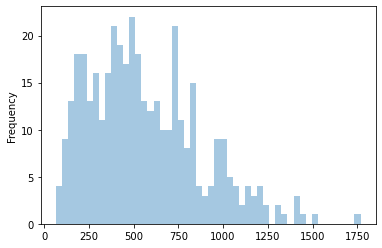

In [20]:
df_hyy_2['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

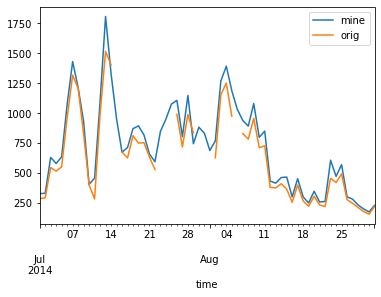

1.13207410632531


In [21]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_2, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

In [22]:
df_hyy_1

year  month  day  OA (microgram m^-3)  CWP (g m^-2)  \
date       LAT  LON                                                         
2012-07-05 60.5 22.5  2012      7    5             3.218589           191   
2012-07-10 60.5 22.5  2012      7   10             4.714353           172   
2012-07-14 60.5 22.5  2012      7   14             1.451827           106   
2012-07-19 60.5 22.5  2012      7   19             3.101941           262   
2012-07-22 60.5 22.5  2012      7   22             0.875789            92   
...                    ...    ...  ...                  ...           ...   
2018-08-13 65.5 29.5  2018      8   13             0.674785           191   
2018-08-14 65.5 29.5  2018      8   14             1.356364           291   
2018-08-19 65.5 29.5  2018      8   19             0.916047           139   
2018-08-20 65.5 29.5  2018      8   20             1.325436           177   
2018-08-27 65.5 29.5  2018      8   27             0.823307           141   

                      CER (micrometer)        COT  
date       LAT  LON                                
2012-07-05 60.5 22.5         12.940000  26.219999  
2012-07-10 60.5 22.5         10.950000  24.430000  
2012-07-14 60.5 22.5         15.790000  12.030000  
2012-07-19 60.5 22.5         16.039999  28.650000  
2012-07-22 60.5 22.5         10.630000  14.820000  
...                                ...        ...  
2018-08-13 65.5 29.5         15.200000  18.969999  
2018-08-14 65.5 29.5         15.200000  31.449999  
2018-08-19 65.5 29.5         18.230000  11.960000  
2018-08-20 65.5 29.5         14.049999  19.869999  
2018-08-27 65.5 29.5         17.430000  13.030000  

[3673 rows x 7 columns]

In [23]:
take_vars = ['N50','N100','N150','N200','N100 (cm^-3)']

In [24]:
import numpy as np

In [25]:
for v in high_low_vars:
    df_hyy_1[v] = np.nan

for d in df_hyy_1.index.get_level_values(0).unique():
    #print(d)
    for v in take_vars:
        df_hyy_1.loc[d,v] = df_joint_hyy.loc[d,v]

/tmp/ipykernel_43708/3996915807.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_hyy_1.loc[d,v] = df_joint_hyy.loc[d,v]


In [26]:
for v in take_vars:
    df_hyy_1[f'{v}_low'] = df_hyy_1[v]<df_hyy_1[v].quantile(.34)
    df_hyy_1[f'{v}_high']= df_hyy_1[v]>df_hyy_1[v].quantile(.66)
    df_hyy_1[f'{v}_category'] = pd.NA#df_hyy_1.assign(OA_category= pd.NA)
    
    df_hyy_1.loc[df_hyy_1[f'{v}_high'], f'{v}_category'] = f'{v} high'
    df_hyy_1.loc[df_hyy_1[f'{v}_low'], f'{v}_category'] = f'{v} low'

In [27]:
high_low_vars

['N50', 'N100', 'N150', 'N200', 'N100 (cm^-3)']

In [28]:
#df_hyy_1['OA_category']

df_hyy_1['OA_low']= df_hyy_1['OA (microgram m^-3)']<2
df_hyy_1['OA_high']= df_hyy_1['OA (microgram m^-3)']>2
ddf_hyy_1=df_hyy_1.assign(OA_category= pd.NA)
df_hyy_1.loc[df_hyy_1['OA_high'], 'OA_category'] = 'OA high'
df_hyy_1.loc[df_hyy_1['OA_low'], 'OA_category'] = 'OA low'



In [29]:
bins = pd.IntervalIndex.from_tuples([(60, 100), (100, 140), (140, 180), (180, 220), (220, 260), (260, 300), (300, 340)])

In [30]:
labels=[ 80, 120, 160, 200, 240, 280, 320]

In [31]:
df_hyy_1['CWP_cut']=pd.cut(df_hyy_1['CWP (g m^-2)'], bins=bins, labels=labels)
df_hyy_1['CWP_qcut']=pd.qcut(df_hyy_1['CWP (g m^-2)'], 6)#bins=bins, labels=labels)

In [32]:
df_hyy_1['CWP_qcutl'] = df_hyy_1['CWP_qcut'].apply(lambda x:x.mid)

df_hyy_1['CWP_cutl'] = df_hyy_1['CWP_cut'].apply(lambda x:x.mid)
di = dict(df_hyy_1.groupby('CWP_cut').median()['CWP (g m^-2)'])
for k in di.keys():
    di[k] = int(np.round(di[k]))
df_hyy_1['CWP_cutlm'] = df_hyy_1['CWP_cut'].apply(lambda x:di[x])

In [33]:
n_bins = 7
labels = np.arange(n_bins)

qants = df_hyy_1['CWP (g m^-2)'].quantile([.05,.95])

bins2 = pd.interval_range(qants.iloc[0], qants.iloc[1], periods=n_bins)
df_hyy_1['CWP_cut2']=pd.cut(df_hyy_1['CWP (g m^-2)'], bins=bins2, labels=labels)


di_per_lab = {bins2[i]:labels[i] for i in range(len(labels))}

df_hyy_1['CWP_cut2l'] = df_hyy_1['CWP_cut2'].apply(lambda x:di_per_lab[x])


di = dict(df_hyy_1.groupby('CWP_cut2').median()['CWP (g m^-2)'])
for k in di.keys():
    di[k] = int(np.round(di[k]))
df_hyy_1['CWP_cut2lm'] = df_hyy_1['CWP_cut2'].apply(lambda x:di[x])

In [34]:
bins2

IntervalIndex([(70.0, 108.85714285714286], (108.85714285714286, 147.71428571428572], (147.71428571428572, 186.57142857142856], (186.57142857142856, 225.42857142857142], (225.42857142857142, 264.2857142857143], (264.2857142857143, 303.1428571428571], (303.1428571428571, 342.0]], dtype='interval[float64, right]')

<AxesSubplot:ylabel='Frequency'>

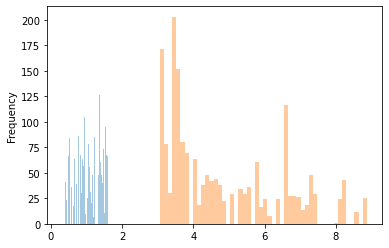

In [35]:
df_hyy_1['OA (microgram m^-3)'][df_hyy_1['OA_low']].plot.hist(bins=50, alpha=0.4, label='obs')
df_hyy_1['OA (microgram m^-3)'][df_hyy_1['OA_high']].plot.hist(bins=50, alpha=0.4, label='obs')



## Get model data:

In [36]:
model_name_noresm = 'NorESM'
model_name_echam  = 'ECHAM-SALSA' 

In [37]:
models =[model_name_noresm, model_name_echam]

### Settings

In [38]:
lon_lims = [293.,308.]
lat_lims = [-8.,-1.]

lat_smr = -2.150
lon_smr = 360-59.009
model_lev_i=-1

temperature = 273.15  # K


str_lonlim = '%.1f-%.1f'%(*lon_lims,)
str_latlim = '%.1f-%.1f'%(*lat_lims,)
str_coordlims = f'{str_lonlim}_{str_latlim}'
str_coordlims

'293.0-308.0_-8.0--1.0'

In [39]:
temperature = 273.15  # K

from_time1 = '2012-01-01'
to_time1 = '2015-01-01'
from_time2 ='2015-01-01'
to_time2 ='2019-01-01'

### NorEMS

In [40]:
case_name_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp245'

#### Input files

In [41]:
fn_noresm = path_extract_latlon_outdata/ case_name_noresm/f'{case_name_noresm}.h1._{from_time1}-{to_time2}_concat_subs_{str_coordlims}_lev1_final.nc'
fn_noresm_csv = path_extract_latlon_outdata/ case_name_noresm/f'{case_name_noresm}.h1._{from_time1}-{to_time2}_concat_subs_{str_coordlims}_lev1_final{season}.csv'

In [42]:

cases_noresm = [case_name_noresm]

#### Station variables

In [43]:
varl_st_noresm = [      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3',
                 ]


varl_cl_noresm = ['TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP','TGCLDLWP','TGCLDIWP',
           'TOT_CLD_VISTAU_s','TOT_ICLD_VISTAU_s','optical_depth',
           'CLDFREE',
           'FCTL',
           'ACTREL','ACTNL','TGCLDLWP',
           'FSDSC','FSDSCDRF',
           'FCTI',
           'FCTL',
           'FLNS',
           'FLNSC',
           'FLNT',
           'FLNTCDRF',
           'FLNT_DRF',
           'FLUS',
           'FLUTC','FORMRATE',
           'FREQI',
           'FREQL',
           'FSDSCDRF',
           'FSDS_DRF',
           'FSNS',
           'FSNSC',
           'FSNT',
           'FSNTCDRF',
           'FSNT_DRF',
           'FSUS_DRF',
           'FSUTADRF',
           ]

### ECHAM-SALSA

In [44]:

case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'

#### Define some strings for files

#### Input files:

In [45]:
input_path_echam = path_extract_latlon_outdata / model_name_echam / case_name_echam 

In [46]:
fn_final_echam = input_path_echam / f'{case_name}_{from_time1}-{to_time2}_ALL-VARS_concat_subs_{str_coordlims}.nc'
fn_final_echam_csv = input_path_echam / f'{case_name}_{from_time1}-{to_time2}_ALL-VARS_concat_subs_{str_coordlims}{season}.csv'

In [47]:

cases_echam = [case_name_echam]

#### Station variables

In [48]:
varl_st_echam = ['mmrtrN500',
                 'mmrtrN250',
                 'mmrtrN200',
                 'mmrtrN100',
                 'mmrtrN50',
                 'mmrtrN3',
                 'SO2_gas',
                 'APIN_gas',
                 'TBETAOCI_gas',
                 'BPIN_gas',
                 'LIMON_gas',
                 'SABIN_gas',
                 'MYRC_gas',
                 'CARENE3_gas',
                 'ISOP_gas',
                 'VBS0_gas',
                 'V*BS1_gas',
                 'VBS10_gas',
                 'ORG_mass',
                 'oh_con',
                 'tempair',
                 'ccn02',
                 'ccn10',

          ]


varl_cl_echam = [
    'airdens',
    'uw',
    'vw',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'emi_monot_bio',
    'emi_isop_bio',
           ]

### READ CVS

In [49]:
df_mod_noresm = pd.read_csv(fn_noresm_csv, index_col=[0,1,2] )

<AxesSubplot:ylabel='Frequency'>

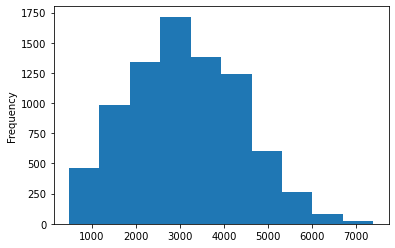

In [50]:
df_mod_noresm['N100'].plot.hist()

In [51]:
df_mod_echam = pd.read_csv(fn_final_echam_csv, index_col=[0,1,2] )

<AxesSubplot:ylabel='Frequency'>

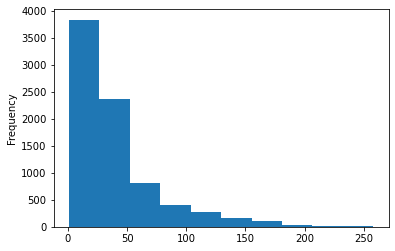

In [52]:
df_mod_echam['N200'].plot.hist()

In [53]:
df_hyy_1.index = df_hyy_1.index.rename({'LAT':'lat', 'LON':'lon','date':'time'})

In [54]:
dic_df=dict()
dic_df[model_name_echam] = df_mod_echam
dic_df[model_name_noresm] = df_mod_noresm
dic_df['Observations'] = df_hyy_1

In [55]:
df_mod_noresm[df_mod_noresm['isSummer'].notnull()]

TOT_ICLD_VISTAU  EC550AER      FLUTC  OD550DRY  \
time       lat       lon                                                      
2012-01-02 -7.068063 293.75              NaN       NaN        NaN       NaN   
                     295.00              NaN       NaN        NaN       NaN   
                     296.25              NaN       NaN        NaN       NaN   
                     297.50              NaN       NaN        NaN       NaN   
                     298.75              NaN       NaN        NaN       NaN   
...                                      ...       ...        ...       ...   
2018-05-31 -1.413613 302.50         0.000000  0.000038  281.37085  0.053408   
                     303.75         0.000000  0.000043  283.28820  0.051337   
                     305.00              NaN       NaN        NaN       NaN   
                     306.25         0.000000  0.000056  279.38232  0.045126   
                     307.50         1.215826  0.000143  277.15314  0.044204   

                               SO4_AC         NMR03   SIGMA05   DERLT05  \
time       lat       lon                                                  
2012-01-02 -7.068063 293.75       NaN           NaN       NaN       NaN   
                     295.00       NaN           NaN       NaN       NaN   
                     296.25       NaN           NaN       NaN       NaN   
                     297.50       NaN           NaN       NaN       NaN   
                     298.75       NaN           NaN       NaN       NaN   
...                               ...           ...       ...       ...   
2018-05-31 -1.413613 302.50  0.001028  4.000000e-08  1.449225  0.084254   
                     303.75  0.001025  4.000000e-08  1.445571  0.085598   
                     305.00       NaN           NaN       NaN       NaN   
                     306.25  0.001016  4.000000e-08  1.438638  0.086221   
                     307.50  0.001025  4.000000e-08  1.473909  0.084009   

                              FSNTCDRF  NCONC03  ...  ismonth4  ismonth5  \
time       lat       lon                         ...                       
2012-01-02 -7.068063 293.75        NaN      NaN  ...       0.0       0.0   
                     295.00        NaN      NaN  ...       0.0       0.0   
                     296.25        NaN      NaN  ...       0.0       0.0   
                     297.50        NaN      NaN  ...       0.0       0.0   
                     298.75        NaN      NaN  ...       0.0       0.0   
...                                ...      ...  ...       ...       ...   
2018-05-31 -1.413613 302.50  418.06497      0.0  ...       0.0       1.0   
                     303.75  562.80330      0.0  ...       0.0       1.0   
                     305.00        NaN      NaN  ...       0.0       1.0   
                     306.25  815.74930      0.0  ...       0.0       1.0   
                     307.50  622.01060      0.0  ...       0.0       1.0   

                             isJuly  isAug  isJA  isSummer    ilev  \
time       lat       lon                                             
2012-01-02 -7.068063 293.75     0.0    0.0   0.0       1.0  1000.0   
                     295.00     0.0    0.0   0.0       1.0  1000.0   
                     296.25     0.0    0.0   0.0       1.0  1000.0   
                     297.50     0.0    0.0   0.0       1.0  1000.0   
                     298.75     0.0    0.0   0.0       1.0  1000.0   
...                             ...    ...   ...       ...     ...   
2018-05-31 -1.413613 302.50     0.0    0.0   0.0       1.0  1000.0   
                     303.75     0.0    0.0   0.0       1.0  1000.0   
                     305.00     0.0    0.0   0.0       1.0  1000.0   
                     306.25     0.0    0.0   0.0       1.0  1000.0   
                     307.50     0.0    0.0   0.0       1.0  1000.0   

                                    lev  station  year  
time       lat       lon                                
2012-01-02 

In [56]:
df_mod_echam[df_mod_echam['isSummer'].notnull()]

ORG_mass   airdens  aot550nm        ccn02  \
time       lat       lon                                                      
2012-01-01 -2.797890 294.375  1.411417e-09  1.126503  0.134215  118992900.0   
                     296.250           NaN       NaN       NaN          NaN   
                     298.125  1.451077e-09  1.171804  0.087378  139835440.0   
                     300.000  1.380874e-09  1.157793  0.098502  123013160.0   
                     301.875  1.408166e-09  1.153663  0.138783  130192860.0   
...                                    ...       ...       ...          ...   
2018-03-31 -6.528409 300.000  6.731928e-10  1.139462  0.069385   42491030.0   
                     301.875  8.832302e-10  1.145241  0.082187   60866044.0   
                     303.750           NaN       NaN       NaN          NaN   
                     305.625  7.832867e-10  1.132065  0.052017   62188320.0   
                     307.500           NaN       NaN       NaN          NaN   

                                    ccn10      ceff    ceff_ct  cl_time  \
time       lat       lon                                                  
2012-01-01 -2.797890 294.375  312438050.0  0.000000  10.090660      0.0   
                     296.250          NaN       NaN        NaN      NaN   
                     298.125  415849340.0  0.000000  13.392654      0.0   
                     300.000  343082300.0  0.000000  14.046279      0.0   
                     301.875  382619520.0  0.000000  14.179204      0.0   
...                                   ...       ...        ...      ...   
2018-03-31 -6.528409 300.000  211066050.0  0.000010  15.283070      0.5   
                     301.875  356293280.0  0.000017  20.193958      1.0   
                     303.750          NaN       NaN        NaN      NaN   
                     305.625  359377440.0  0.000015  10.649448      1.0   
                     307.500          NaN       NaN        NaN      NaN   

                                  clfr        cod  ...  month  ismonth1  \
time       lat       lon                           ...                    
2012-01-01 -2.797890 294.375  0.000000   6.648303  ...    1.0       1.0   
                     296.250       NaN        NaN  ...    1.0       1.0   
                     298.125  0.000000   5.841970  ...    1.0       1.0   
                     300.000  0.000000  10.722664  ...    1.0       1.0   
                     301.875  0.000000  19.732063  ...    1.0       1.0   
...                                ...        ...  ...    ...       ...   
2018-03-31 -6.528409 300.000  0.500000   5.761695  ...    3.0       0.0   
                     301.875  0.340437   6.906441  ...    3.0       0.0   
                     303.750       NaN        NaN  ...    3.0       0.0   
                     305.625  0.225494   8.644047  ...    3.0       0.0   
                     307.500       NaN        NaN  ...    3.0       0.0   

                              ismonth2  ismonth3  isJuly  isAug  isJA  \
time       lat       lon                                                
2012-01-01 -2.797890 294.375       0.0       0.0     0.0    0.0   0.0   
                     296.250       0.0       0.0     0.0    0.0   0.0   
                     298.125       0.0       0.0     0.0    0.0   0.0   
                     300.000       0.0       0.0     0.0    0.0   0.0   
                     301.875       0.0       0.0     0.0    0.0   0.0   
...                                ...       ...     ...    ...   ...   
2018-03-31 -6.528409 300.000       0.0       1.0     0.0    0.0   0.0   
                     301.875       0.0       1.0     0.0    0.0   0.0   
                     303.750       0.0       1.0     0.0    0.0   0.0   
                     305.625       0.0       1.0     0.0    0.0   0.0   
                     307.500       0.0       1.0     0.0    0.0   0.0   

                              isSummer   lev  year  
time       lat       lon                           

# Mask data

### NorESM

## Masking if less than 10% liquid cloud top fraction and if liquid is less than 80% of the cloud top 

In [57]:
df_mod = dic_df[model_name_noresm]
mask_liq_cloudtop = (df_mod['FCTL']>0.1) & (df_mod['FCTL']/(df_mod['FCTL']+df_mod['FCTI'])>.8)


df_mod.loc[:,'mask_liq_cloudtop'] = mask_liq_cloudtop
dic_df[model_name_noresm] = df_mod[mask_liq_cloudtop]

<AxesSubplot:xlabel='TGCLDCWP', ylabel='CWP'>

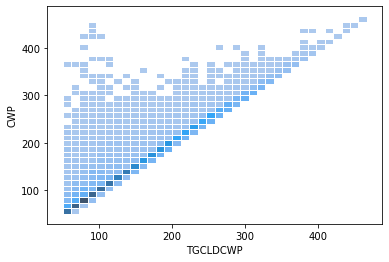

In [58]:
v_x = 'TGCLDCWP'
#ax = axs[1]
df_mod = dic_df[model_name_noresm]

_df = (df_mod[df_mod[v_x].notnull()])#[(df_mod['OA_category'].notna())])
_df = _df[_df[v_x]>50]
_df = _df[_df[v_x]<10000]
sns.histplot(
    x=v_x,
    y= 'CWP',
    data=_df,
    #hue=v_hue,
    #hue_order=hue_order,
    #ax = ax,
    legend=False,
    palette = 'Set1',
    edgecolor='w',
)

## ECHAM

In [59]:
df_mod = dic_df[model_name_noresm]

In [60]:
#mask_cl_waterpath = df_mod['cwp']>50

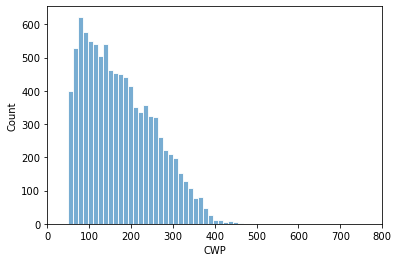

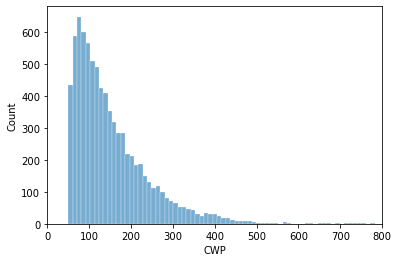

(0.0, 1000.0)

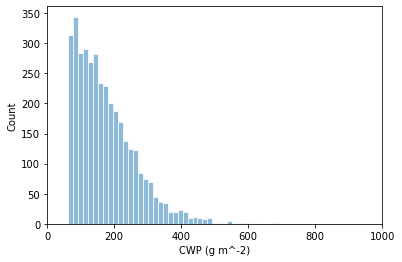

In [61]:
#(1000*df_mod['cwp']).plot.hist()
v_x = 'CWP'
#ax = axs[1]
df_mod = dic_df[model_name_noresm]

_df = (df_mod[df_mod[v_x].notnull()])#[(df_mod['OA_category'].notna())])
_df = _df[_df[v_x]>50]
_df = _df[_df[v_x]<10000]
sns.histplot(
    x=v_x,
    data=_df,
    #hue=v_hue,
    #hue_order=hue_order,
    #ax = ax,
    legend=False,
    palette = 'Set1',
    alpha=.6,
    edgecolor='w',
)
plt.xlim([0,800])
plt.show()
v_x = 'CWP'
#ax = axs[1]
df_mod = dic_df[model_name_echam]

_df = (df_mod)#[(df_mod['OA_category'].notna())])
#_df = _df[_df[v_x]>50]
sns.histplot(
    x=v_x,
    data=_df,
    #hue=v_hue,
    #hue_order=hue_order,
    #ax = ax,
    legend=False,
    palette = 'Set1',
    alpha=.6,
    edgecolor='w',
)
plt.xlim([0,800])
plt.show()

v_x = 'CWP (g m^-2)'
_df = (dic_df['Observations'])#[(df_mod['OA_category'].notna())])
_df = _df[_df[v_x]>50]
sns.histplot(
    x=v_x,
    data=_df,
    #hue=v_hue,
    palette = 'hls',
    alpha=.5,
    #hue_order=hue_order,
    #ax = ax,
    legend=False,
    #palette = _palette,
    edgecolor='w',
)
plt.xlim([0,1000])

In [62]:
dic_df.keys()

dict_keys(['ECHAM-SALSA', 'NorESM', 'Observations'])

### Remove grid vells with no cloud top liquid

More than 10% cloud top liquid fraction in grid cell and 90% of the cloud fraction is covered by liquid. 

## Rename 


In [63]:
rn_dic_echam = {
    #'cwp'      : 'CWP',
   # 'cwp_incld'      : 'CWP',
   # 'cod'      : 'COT',
    #'ceff_ct'  : 'r_eff',
   # 'ceff_ct_incld'  : 'r_eff',
    
    
}
rn_dic_noresm = {
    'TGCLDCWP_incld'         : 'CWP',
    'TOT_CLD_VISTAU_s_incld': 'COT',
    'ACTREL_incld'     : 'r_eff',
}
rn_dic_obs = {
    'CWP (g m^-2)'        : 'CWP',
    'CER (micrometer)'    : 'r_eff',
    'OA (microgram m^-3)' : 'OA',
    
}



In [64]:
dic_df['ECHAM-SALSA']['CWP']

time        lat        lon    
2012-01-01  -2.797890  294.375     56.807160
                       296.250           NaN
                       298.125     57.340843
                       300.000    150.547880
                       301.875    272.306700
                                     ...    
2018-12-31  -6.528409  300.000           NaN
                       301.875           NaN
                       303.750           NaN
                       305.625           NaN
                       307.500           NaN
Name: CWP, Length: 61368, dtype: float64

In [65]:
for key, rn in zip([model_name_noresm, model_name_echam,'Observations'], [rn_dic_noresm, rn_dic_echam, rn_dic_obs]):
    dic_df[key] = dic_df[key].rename(rn, axis=1)

## Group by cloud water path

In [66]:
pd.to_datetime(df_mod.reset_index()['time']).dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [67]:
dic_bins = dict()
dic_bins[model_name_noresm] = pd.IntervalIndex.from_breaks([   50,  80,  110, 140, 170, 200,230, 500])
dic_bins[model_name_echam] = pd.IntervalIndex.from_breaks([   50,  80,  110, 140, 170, 200,230, 500])

In [68]:
df_mod = dic_df[model_name_noresm]

v = 'CLDFREE'
df_mod[v].quantile(.99)

0.2927063697999981

In [69]:
df_mod[v].mean()

0.019442372631796066

In [70]:
df_mod[v].max()

1.0

In [71]:
df_mod[v].min()

0.0

for key in dic_df.keys():
    df_mod = dic_df[key]
    df_mod['CWP_qcut']=pd.qcut(df_mod['CWP'],6)# bins=bins, labels=labels)§
    df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)
    dic_df[key] = df_mod
    

    df_mod = dic_df[model_name]
    bins = dic_bins[model_name]
    df_mod['CWP_cut']=pd.cut(df_mod['CWP'], bins=bins)#, labels=labels)


    df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)


    df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)


In [72]:
for model_name in models:
    print(model_name)
    df_mod = dic_df[model_name]
    # Optical thickness > 50:
    df_mod = df_mod[df_mod['CWP']>=50]

    bins = dic_bins[model_name]
    df_mod['CWP_cut']=pd.cut(df_mod['CWP'], bins=bins)#, labels=labels)

    
    df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)
    di = dict(df_mod.groupby('CWP_cut').median()['CWP'])
    for k in di.keys():
        di[k] = int(np.round(di[k]))
    df_mod['CWP_cutlm'] = df_mod['CWP_cut'].apply(lambda x:di[x])
    
    n_bins = 7
    labels = np.arange(n_bins)

    qants = df_mod['CWP'].quantile([.05,.95])

    bins2 = pd.interval_range(qants.iloc[0], qants.iloc[1], periods=n_bins)
    df_mod['CWP_cut2']=pd.cut(df_mod['CWP'], bins=bins2, labels=labels)
    di_per_lab = {bins2[i]:labels[i] for i in range(len(labels))}

    df_mod['CWP_cut2l'] = df_mod['CWP_cut2'].apply(lambda x:di_per_lab[x])
    di = dict(df_mod.groupby('CWP_cut2').median()['CWP'])
    for k in di.keys():
        di[k] = int(np.round(di[k]))
    df_mod['CWP_cut2lm'] = df_mod['CWP_cut2'].apply(lambda x:di[x])
    
    
    
    df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)
    df_mod['OA_high']= df_mod['OA']>df_mod['OA'].quantile(.66)
    mid_range = ( df_mod['OA'].quantile(.34)<df_mod['OA']) & (df_mod['OA']<df_mod['OA'].quantile(.66))
    df_mod['OA_mid_range'] = mid_range
    df_mod=df_mod.assign(OA_category= pd.NA)
    df_mod.loc[df_mod['OA_high'], 'OA_category'] = 'OA high'
    df_mod.loc[df_mod['OA_low'], 'OA_category'] = 'OA low'
    
    
    
    
    for v in high_low_vars:
        if v not in df_mod.columns:
            continue 
        df_mod[f'{v}_low'] = df_mod[v]<df_mod[v].quantile(.34)
        df_mod[f'{v}_high']= df_mod[v]>df_mod[v].quantile(.66)
        df_mod[f'{v}_category'] = pd.NA#df_hyy_1.assign(OA_category= pd.NA)
    
        df_mod.loc[df_mod[f'{v}_high'], f'{v}_category'] = f'{v} high'
        df_mod.loc[df_mod[f'{v}_low'], f'{v}_category'] = f'{v} low'
    
    
    dic_df[model_name] = df_mod
    
    
    
    
for model_name in [model_name_noresm]:
    df_mod = dic_df[model_name]
    v = 'CLDFREE'
    df_mod[f'{v}_low'] = df_mod[v]<df_mod[v].quantile(.34)
    df_mod[f'{v}_high']= df_mod[v]>df_mod[v].quantile(.66)
    mid_range = ( df_mod[v].quantile(.34)<df_mod[v]) & (df_mod[v]<df_mod[v].quantile(.66))
    df_mod[f'{v}_mid_range'] = mid_range
    df_mod=df_mod.assign(**{f'{v}_category': pd.NA})
    df_mod.loc[df_mod[f'{v}_high'], f'{v}_category'] = f'{v} high'
    df_mod.loc[df_mod[f'{v}_low'], f'{v}_category'] = f'{v} low'
    dic_df[model_name] = df_mod

NorESM
ECHAM-SALSA


/tmp/ipykernel_43708/970158435.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CWP_cut']=pd.cut(df_mod['CWP'], bins=bins)#, labels=labels)
/tmp/ipykernel_43708/970158435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)
/tmp/ipykernel_43708/970158435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [73]:
for key in dic_df.keys():
    df_mod = dic_df[key]
    df_mod['CWP_qcut']=pd.qcut(df_mod['CWP'],6)# bins=bins, labels=labels)§
    df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)
    dic_df[key] = df_mod

## Category of OA concentration

## Distribution plots:

In [74]:
palette = 'Set2'

In [75]:
import numpy as np

In [76]:
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [77]:
#cmap = cm.get_cmap(name=palette, )
cmap_list = ['#441FE0','#BBE01F'][::-1]#cmap(a) for a in np.linspace(0,1,8)]

In [78]:
palette_OA = cmap_list[0:2]

3673
Plots/dist_plot/cloud_props_ATTO_WET_early_distribution_mod_obs_COT_count.png


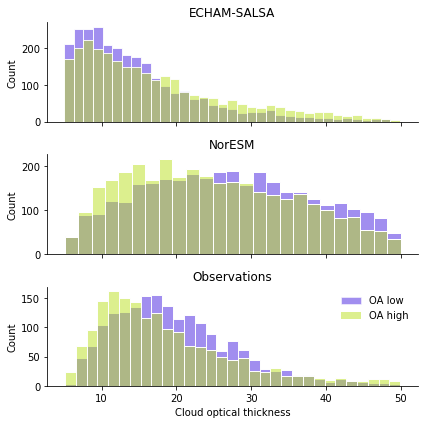

In [79]:
fig, axs = plt.subplots(3,1, sharex=True, figsize =[6,6])
v_x = 'COT'
x_cut = 100

v_hue = 'OA_category'
hue_order=['OA low', 'OA high'][::-1]

_palette = palette_OA#cmap_list[0:2]


for key, ax in zip(dic_df.keys(), axs):
    _df = dic_df[key].copy()
    _df = _df[_df[v_x]<x_cut]

    sns.histplot(
        x=v_x,
        data=_df,
        hue=v_hue,
        hue_order=hue_order,
        palette=_palette,
        legend=False,
        edgecolor='w',
        ax = ax
    )
#plt.ylim([0,250])
    ax.set_title(key)#'Observations')



custom_lines = [Line2D([0], [0], color=cmap_list[0], lw=4),
                Line2D([0], [0], color=cmap_list[1], lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)

               ]

leg_els = [

    Patch(edgecolor='w',alpha = .5, facecolor=_palette[1], label='OA low'),
    Patch(edgecolor=None, alpha = .5,facecolor=_palette[0], label='OA high'),

]

ax.legend(handles = leg_els, frameon=False)
ax.set_xlabel('Cloud optical thickness')
#plt.ylim([0,250])
print(len(_df))
sns.despine(fig)

fn = make_fn('mod_obs', v_x,'count',comment='distribution', distplot=True)
print(fn)

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



3659
Plots/dist_plot/cloud_props_ATTO_WET_early_distribution_mod_obs_CWP_count.png


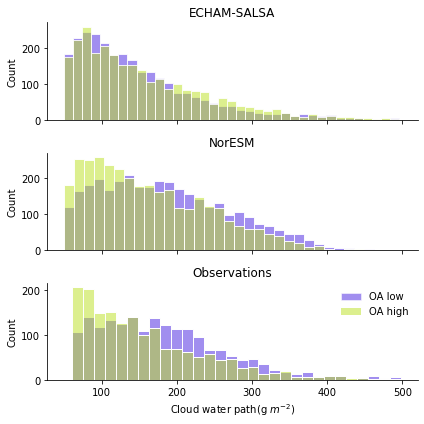

In [80]:
fig, axs = plt.subplots(3,1, sharex=True, figsize =[6,6])

v_x = 'CWP'
x_cut = 500
v_hue = 'OA_category'
hue_order=['OA low', 'OA high'][::-1]

_palette = palette_OA#cmap_list[0:2]


for key, ax in zip(dic_df.keys(), axs):
    _df = dic_df[key].copy()
    _df = _df[_df[v_x]<x_cut]

    sns.histplot(
        x=v_x,
        data=_df,
        hue=v_hue,
        hue_order=hue_order,
        palette=_palette,
        legend=False,
        edgecolor='w',
        ax = ax
    )
#plt.ylim([0,250])
    ax.set_title(key)#'Observations')



custom_lines = [Line2D([0], [0], color=cmap_list[0], lw=4),
                Line2D([0], [0], color=cmap_list[1], lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)

               ]

leg_els = [

    Patch(edgecolor='w',alpha = .5, facecolor=_palette[1], label='OA low'),
    Patch(edgecolor=None, alpha = .5,facecolor=_palette[0], label='OA high'),

]

ax.legend(handles = leg_els, frameon=False)
ax.set_xlabel('Cloud water path(g $m^{-2}$)')

#plt.ylim([0,250])
print(len(_df))
sns.despine(fig)

fn = make_fn('echam_noresm', v_x,'obs',comment='distribution')

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fn = make_fn('mod_obs', v_x,'count',comment='distribution', distplot=True)
print(fn)

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



In [81]:
s = dic_df[model_name_echam]['r_eff']#*dic_df[model_name_echam]['cl_time']
s = s[0<s]
len(s[s.notna()])

8050

8050
9730
3673
Plots/dist_plot/cloud_props_ATTO_WET_early_distribution_mod_obs_r_eff_count.png


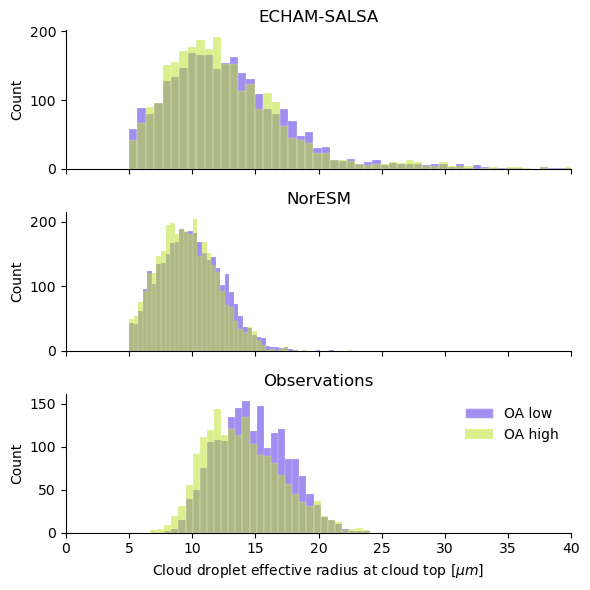

In [82]:
fig, axs = plt.subplots(3,1, sharex=True, figsize =[6,6], dpi=100)

v_x = 'r_eff'
x_cut = 700
v_hue = 'OA_category'
hue_order=['OA low', 'OA high'][::-1]

_palette = palette_OA#cmap_list[0:2]


for key, ax in zip(dic_df.keys(), axs):
    _df = dic_df[key].copy()
    _df = _df[_df[v_x]<x_cut]
    _df = _df[_df[v_x]>0]

    sns.histplot(
        x=v_x,
        data=_df,
        hue=v_hue,
        hue_order=hue_order,
        palette=_palette,
        legend=False,
        edgecolor='w',
        ax = ax
    )
    #plt.ylim([0,250])
    ax.set_title(key)#'Observations')
    print(len(_df))
    


custom_lines = [Line2D([0], [0], color=cmap_list[0], lw=4),
                Line2D([0], [0], color=cmap_list[1], lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)

               ]

leg_els = [

    Patch(edgecolor='w',alpha = .5, facecolor=_palette[1], label='OA low'),
    Patch(edgecolor=None, alpha = .5,facecolor=_palette[0], label='OA high'),

]

ax.legend(handles = leg_els, frameon=False)
ax.set_xlabel('Cloud droplet effective radius at cloud top [$\mu m$]')

#plt.ylim([0,250])
sns.despine(fig)

for ax in axs: 
    ax.set_xlim([0,40])
fn = make_fn('echam_noresm', v_x,'obs',comment='distribution')

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fn = make_fn('mod_obs', v_x,'count',comment='distribution', distplot=True)
print(fn)
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



### Fractional occurance of cloud top liquid

## Cloud optical thickness

### Incloud

In [83]:
hue_order = ['OA low','OA high']#[::-1]
palette_OA_2 = palette_OA[::-1]

In [84]:
order_keys = [model_name_noresm, model_name_echam, 'Observations']

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_N100_category_COT_CWP_cut2l.png


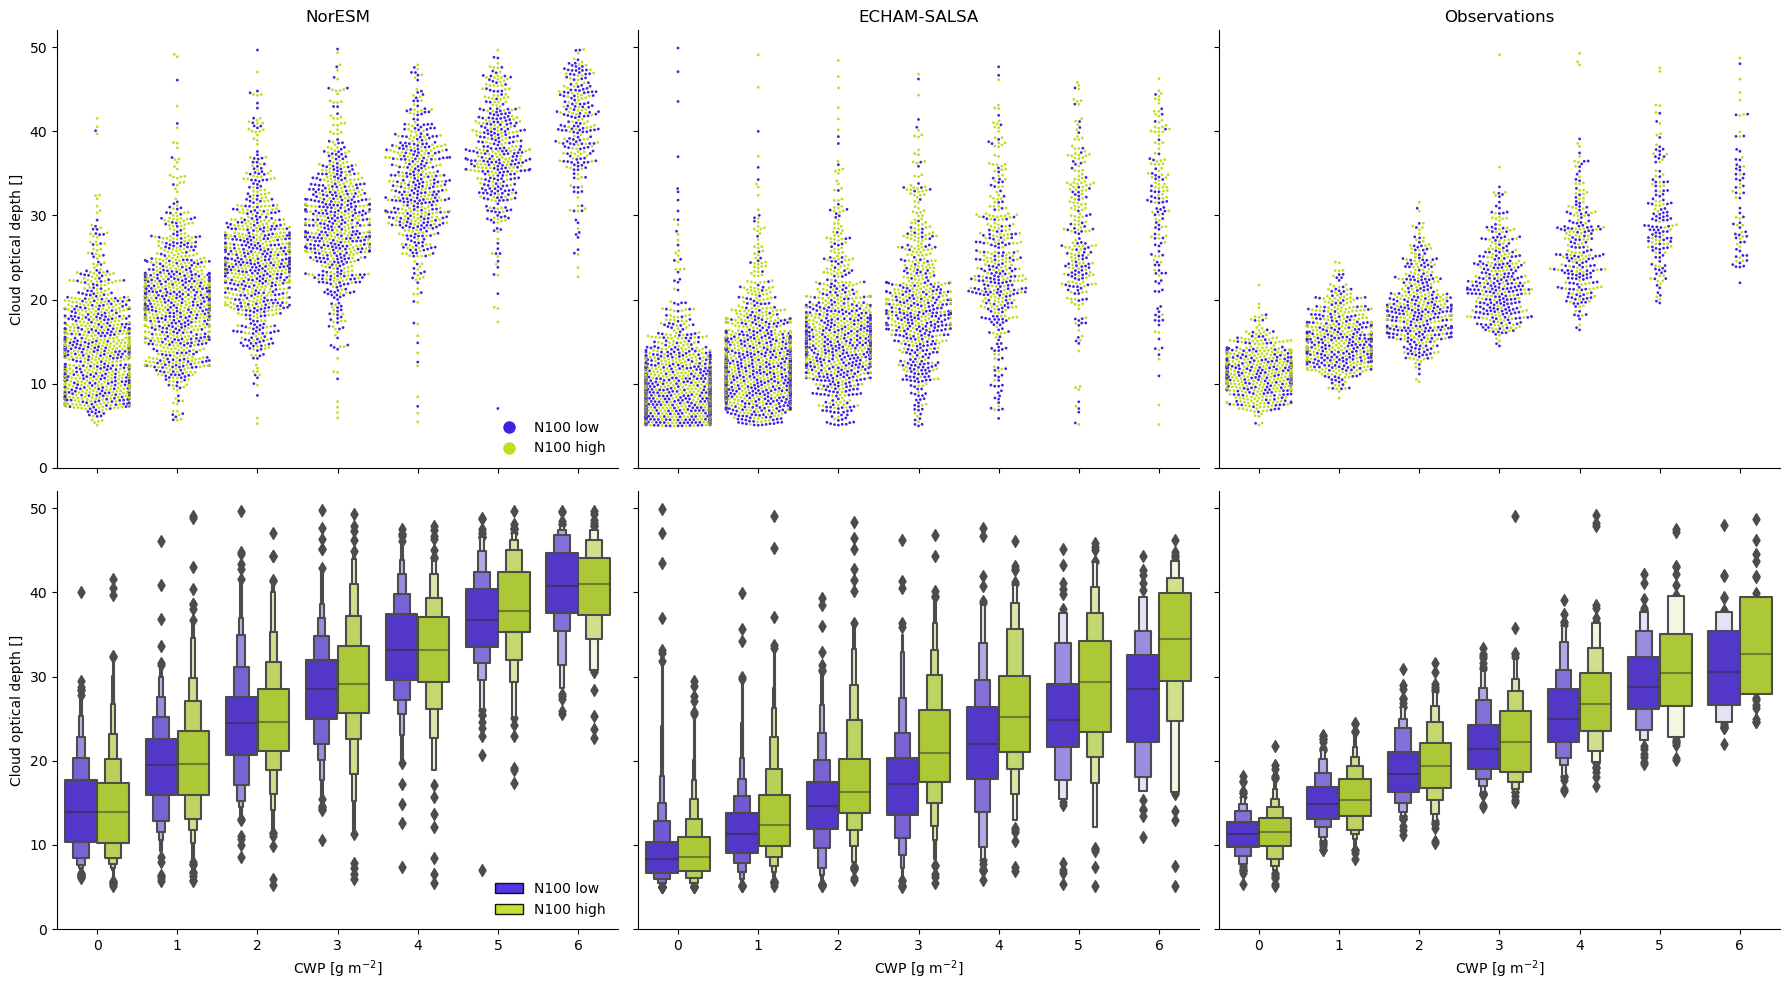

In [85]:
x_var = 'CWP_cut2l'
y_var = 'COT'
hue_var = 'N100_category'
hue_labs = ['N100 low', 'N100 high']

v_hue = 'N100_category'
category = 'N100_category'


hue_order=['N100 low', 'N100 high']#[::-1]

ylim = [0,52]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_N200_category_COT_CWP_cut2l.png


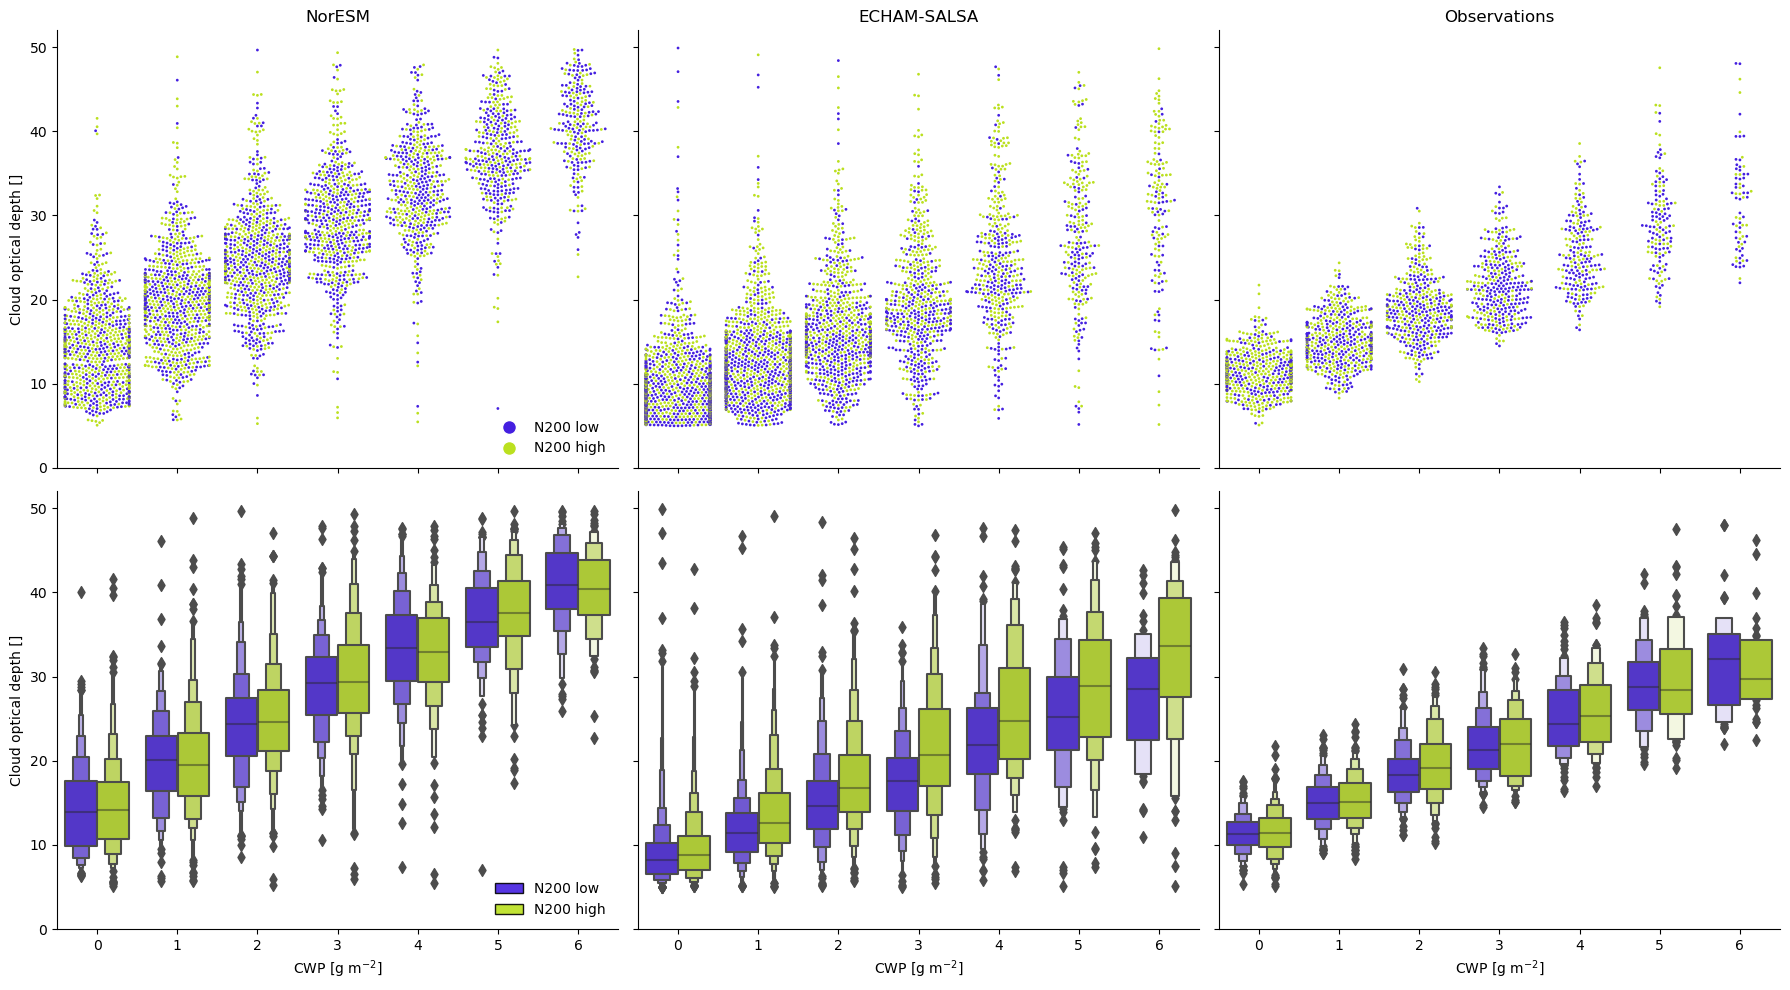

In [86]:
x_var = 'CWP_cut2l'
y_var = 'COT'
hue_var = 'N200_category'
hue_labs = ['N200 low', 'N200 high']

v_hue = 'N200_category'
category = 'N200_category'


hue_order=['N200 low', 'N200 high']#[::-1]

ylim = [0,52]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_N50_category_COT_CWP_cut2l.png


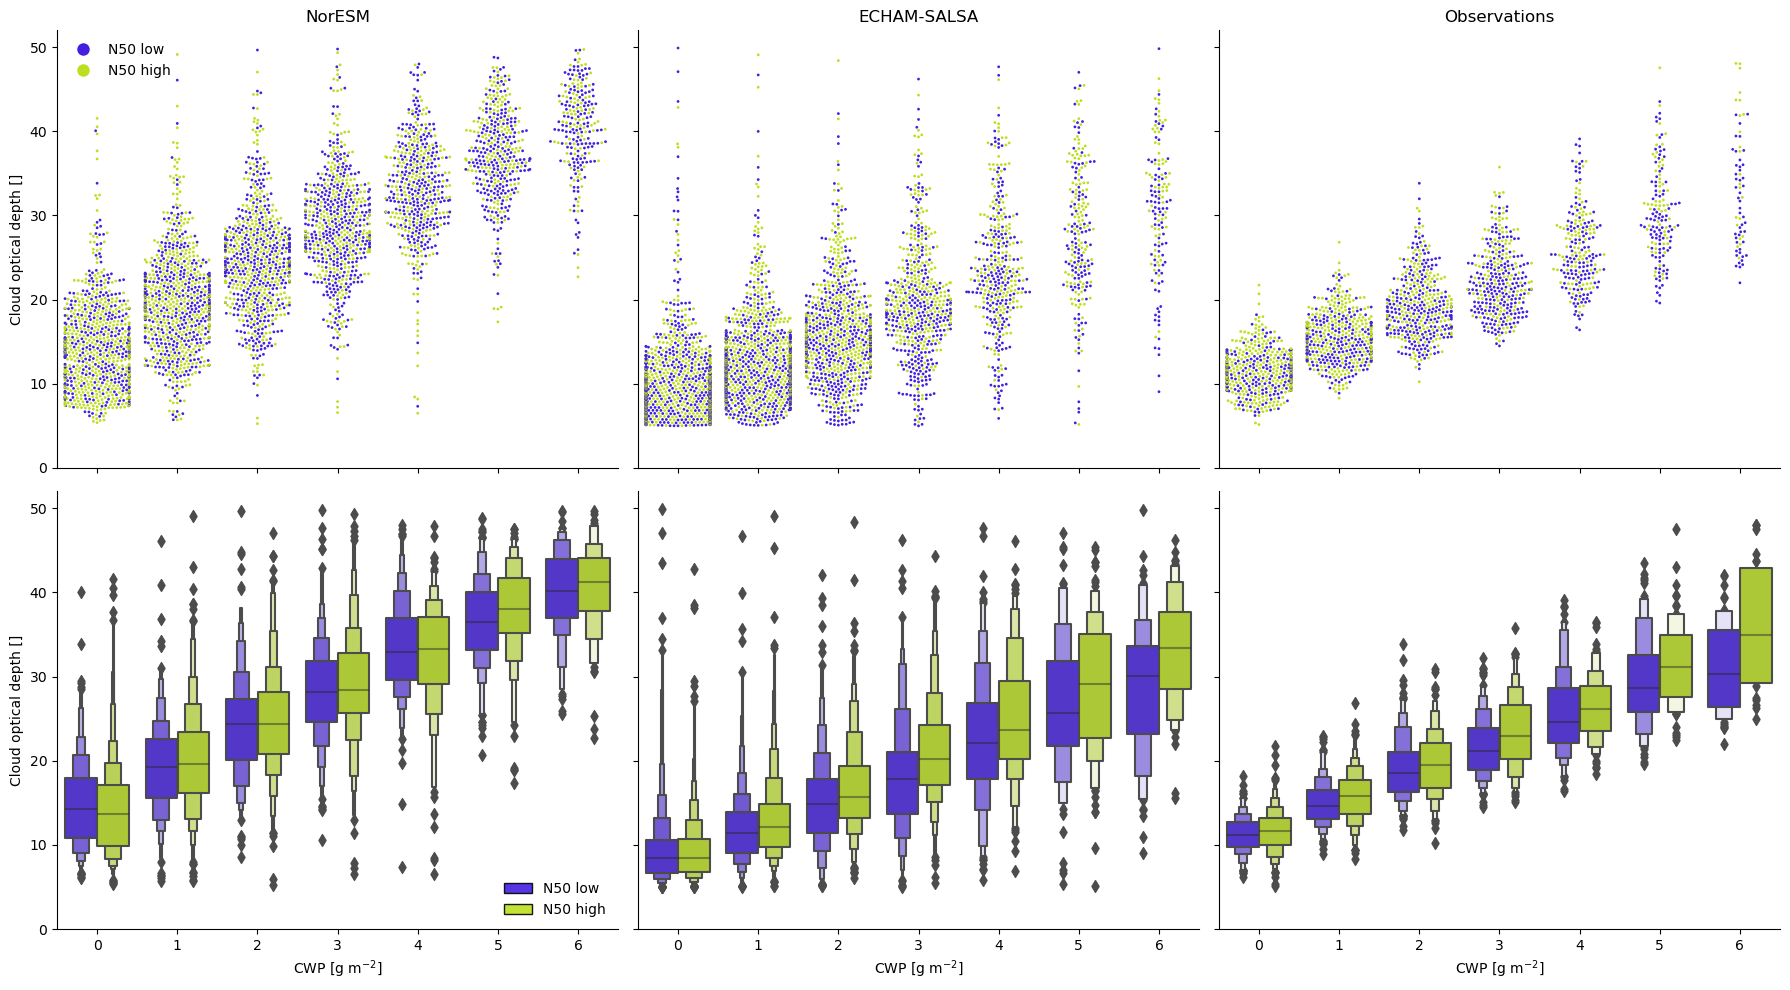

In [87]:
x_var = 'CWP_cut2l'
y_var = 'COT'
hue_var = 'N50_category'
hue_labs = ['N50 low', 'N50 high']

v_hue = 'N50_category'
category = 'N50_category'


hue_order=['N50 low', 'N50 high']#[::-1]

ylim = [0,52]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_N100_category_r_eff_CWP_cut2l.png


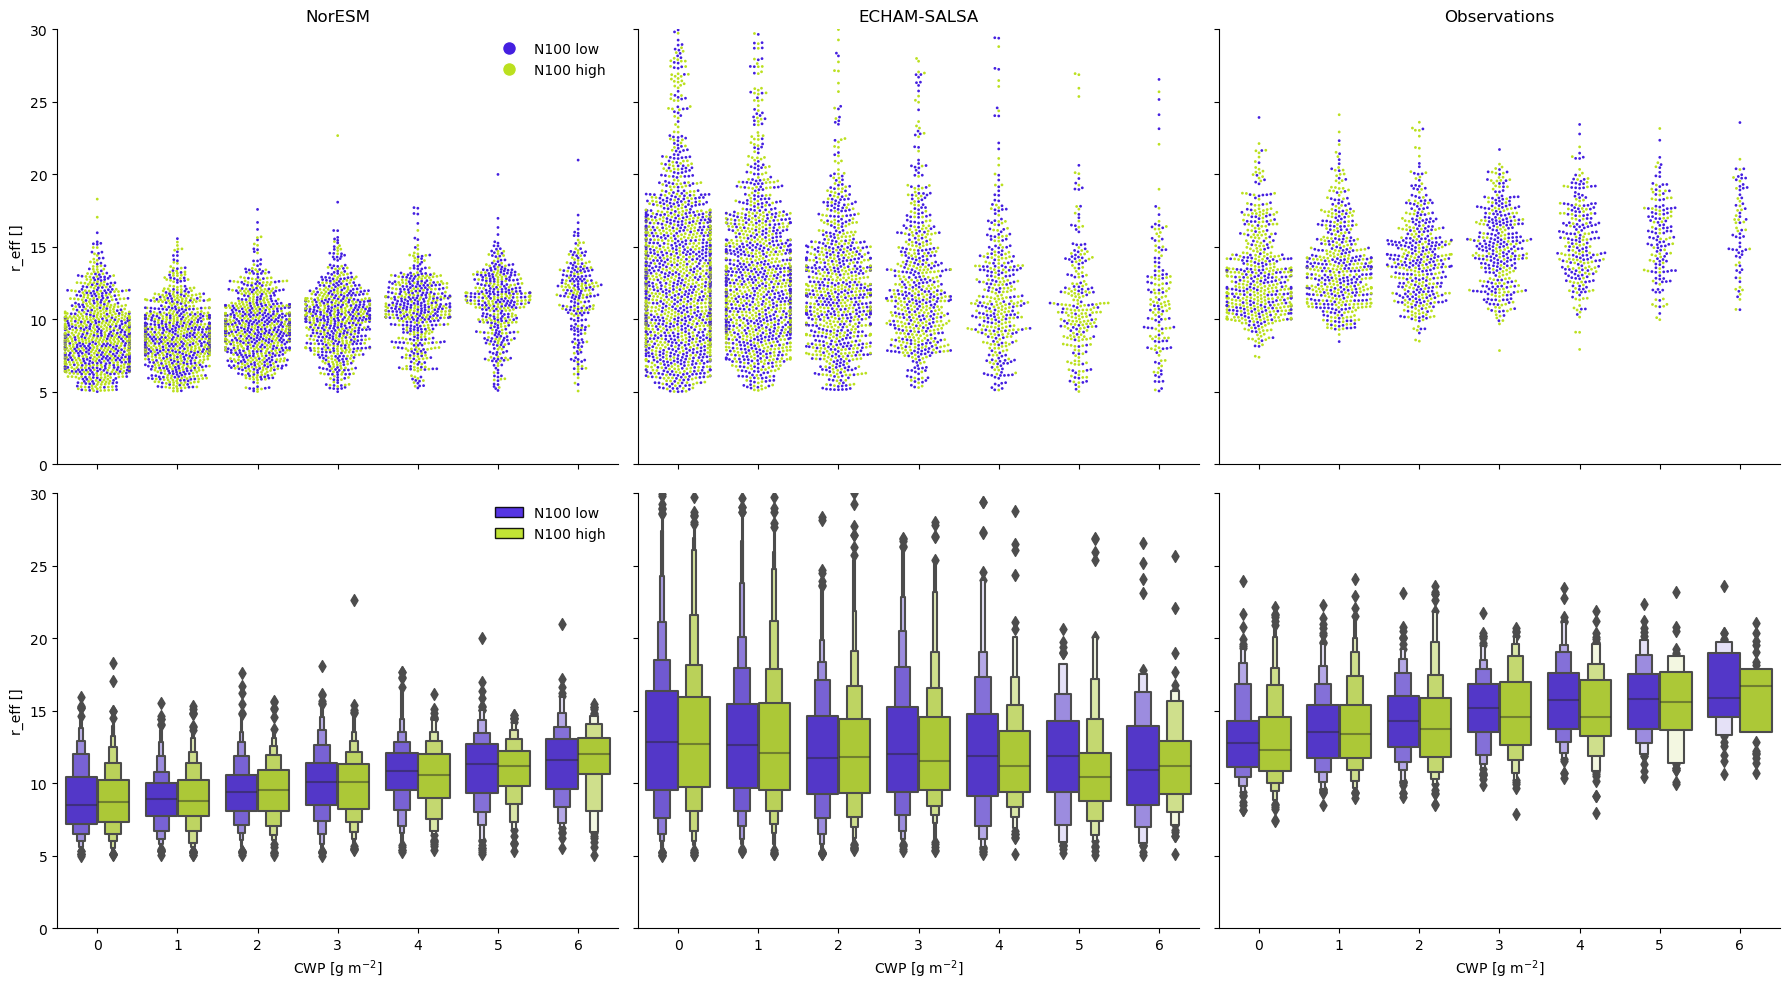

In [100]:
x_var = 'CWP_cut2l'
y_var = 'r_eff'
hue_var = 'N100_category'
hue_labs = ['N100 low', 'N100 high']

v_hue = 'N100_category'
category = 'N100_category'


hue_order=['N100 low', 'N100 high']#[::-1]

ylim = [0,30]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r_eff []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_N200_category_r_eff_CWP_cut2l.png


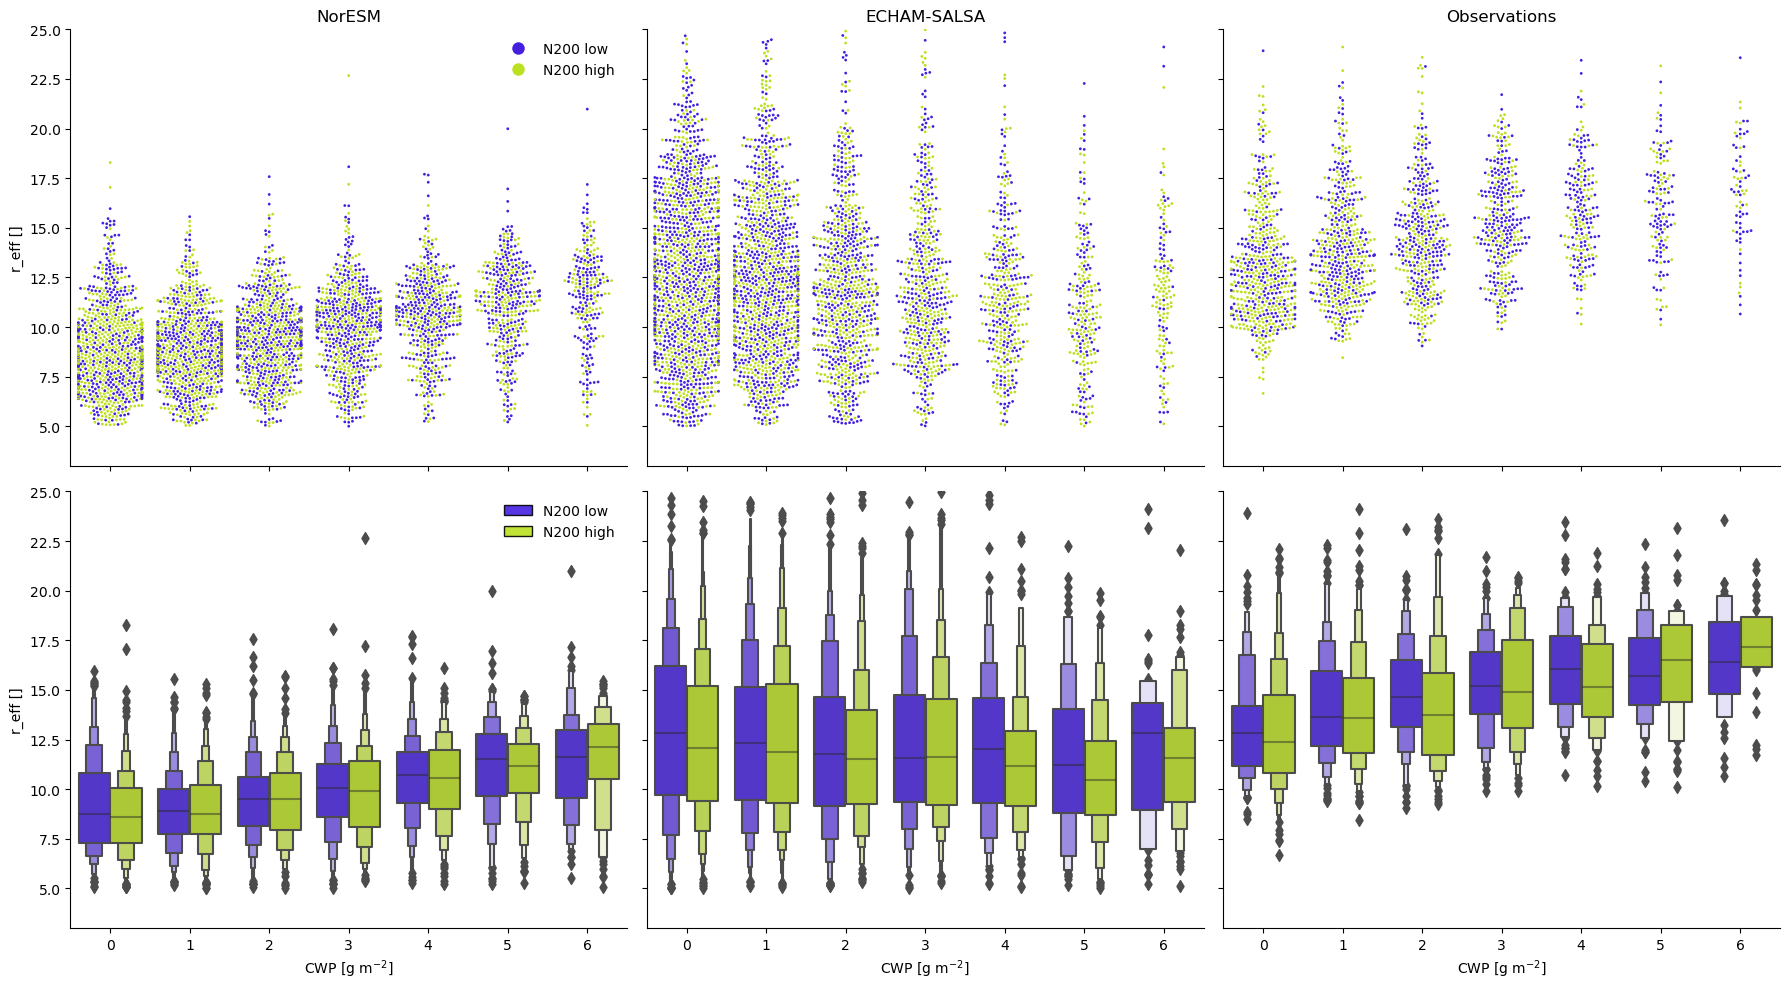

In [102]:
x_var = 'CWP_cut2l'
y_var = 'r_eff'
hue_var = 'N200_category'
hue_labs = ['N200 low', 'N200 high']

v_hue = 'N200_category'
category = 'N200_category'


hue_order=['N200 low', 'N200 high']#[::-1]

ylim = [3,25]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r_eff []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_N50_category_r_eff_CWP_cut2l.png


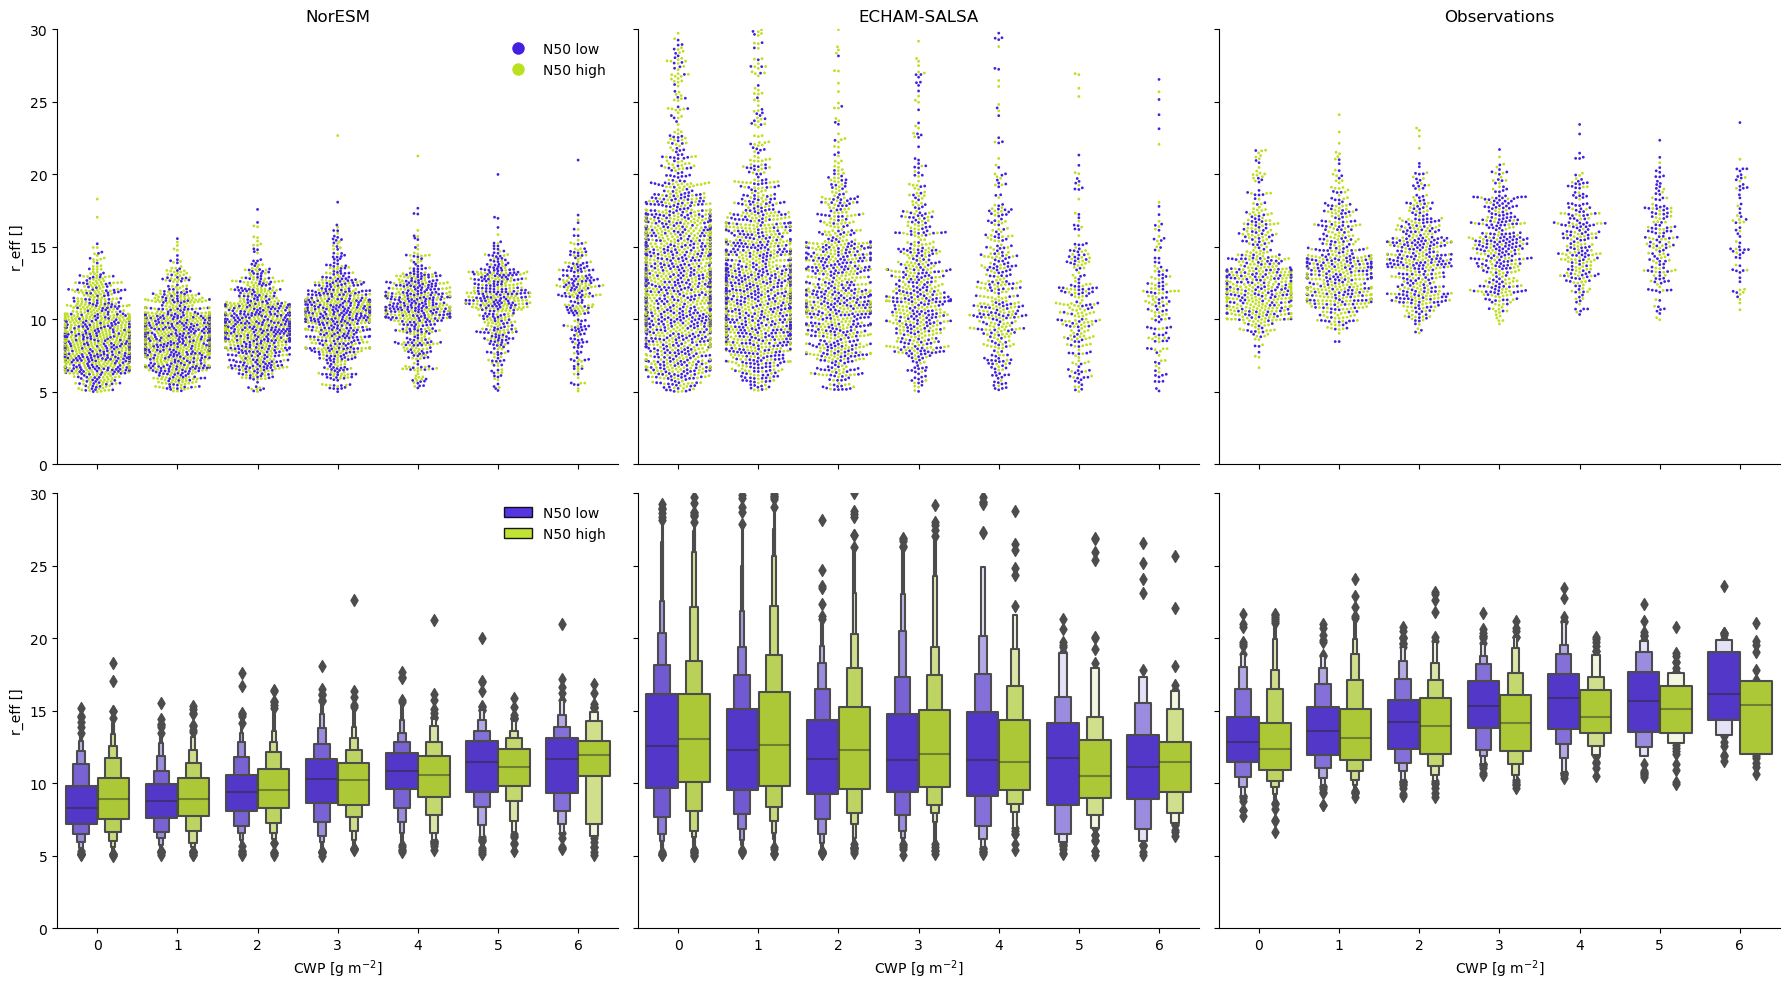

In [98]:
x_var = 'CWP_cut2l'
y_var = 'r_eff'
hue_var = 'N50_category'
hue_labs = ['N50 low', 'N50 high']

v_hue = 'N50_category'
category = 'N50_category'


hue_order=['N50 low', 'N50 high']#[::-1]

ylim = [0,30]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r_eff []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_OA_category_COT_CWP_cutlm.png


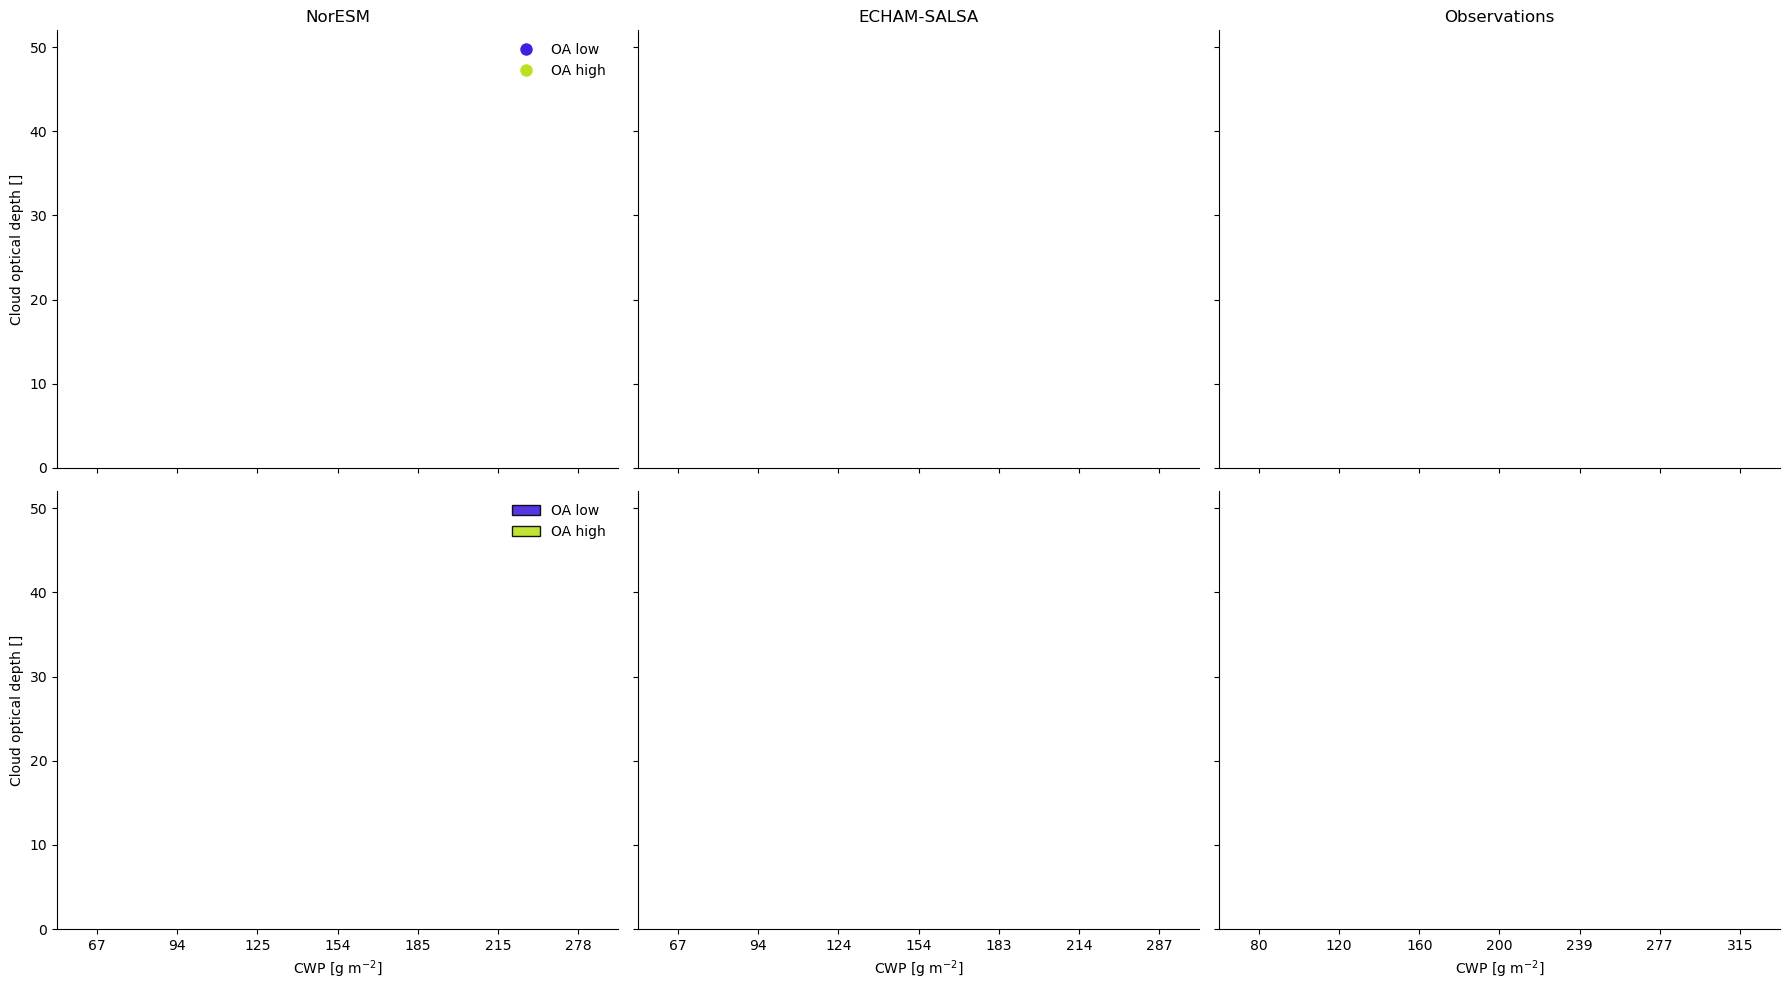

In [88]:
x_var = 'CWP_cutlm'
y_var = 'COT'
hue_var = 'OA_category'
hue_labs = ['OA low', 'OA high']
ylim = [0,52]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_OA_category_r_eff_CWP_cutlm.png


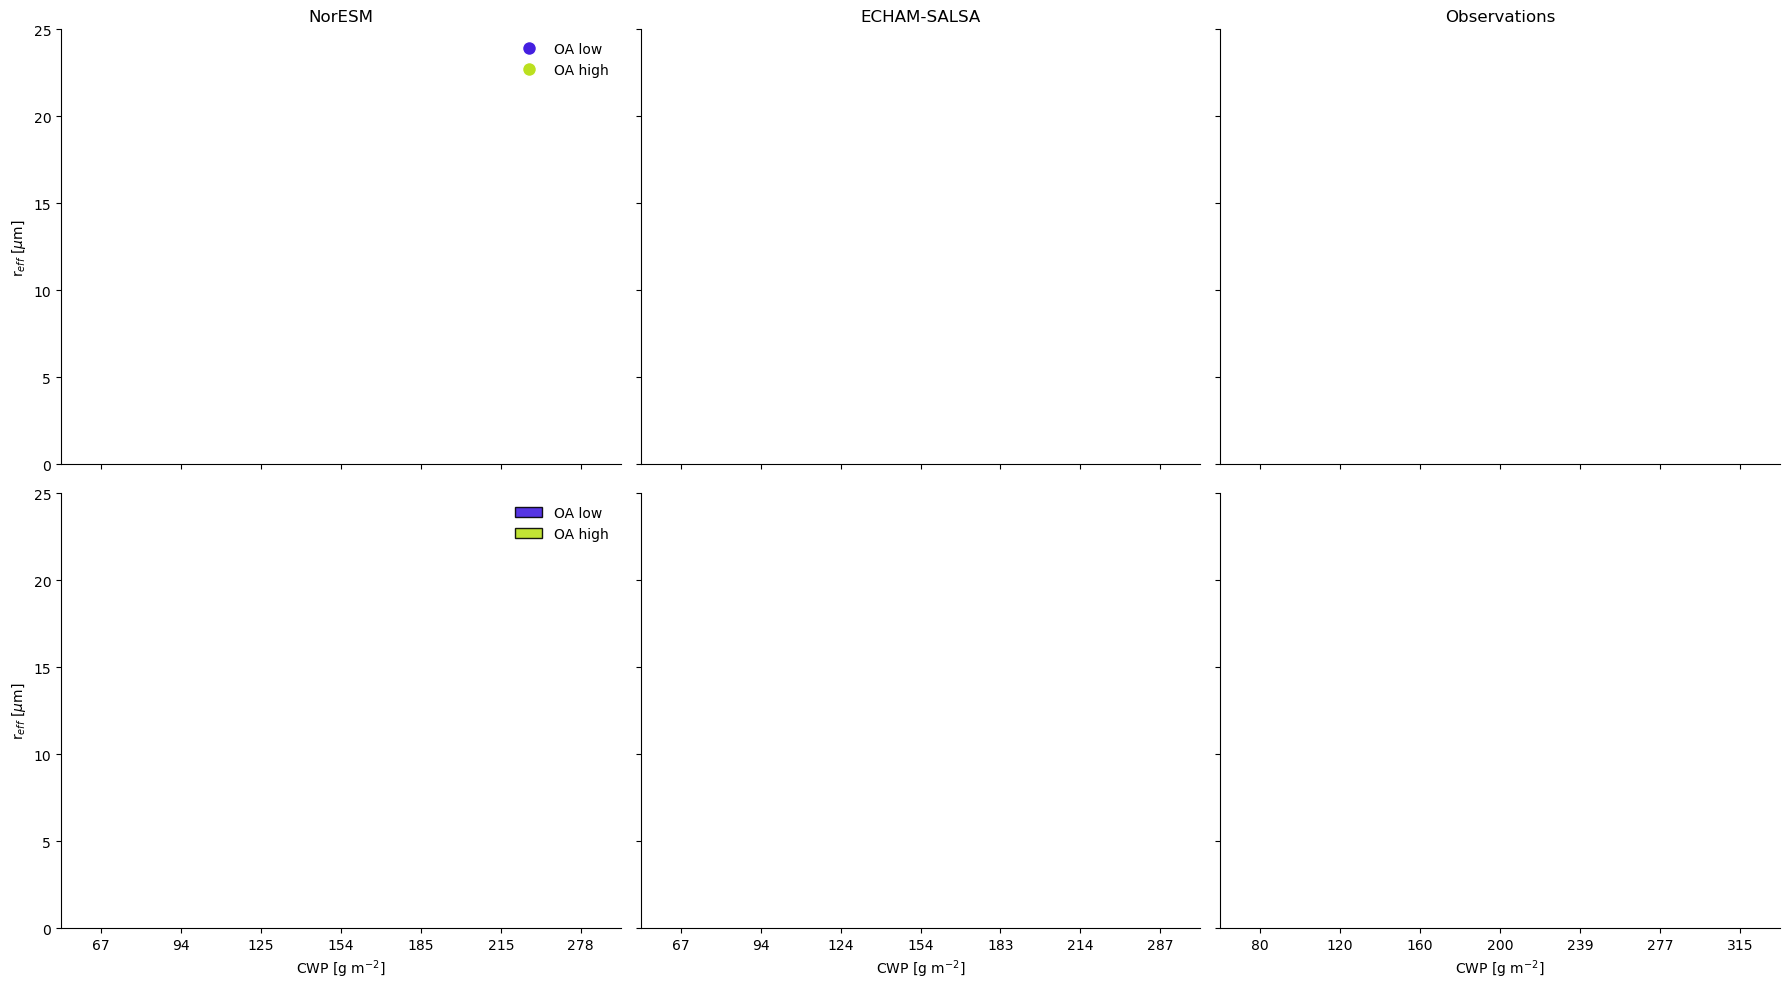

In [89]:
x_var = 'CWP_cutlm'
y_var = 'r_eff'
hue_var = 'OA_category'
hue_labs = ['OA low', 'OA high']
ylim = [0,25]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
#for key,ax in zip(dic_df.keys(), axs[0,:]):

    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

for key,ax in zip(order_keys, axs[1,:]):
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r$_{eff}$ [$\mu$m]')
    
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)

sns.despine(fig)
fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
plt.show()

### Grid box avg

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_OA_category_r_eff_CWP_cut2l.png


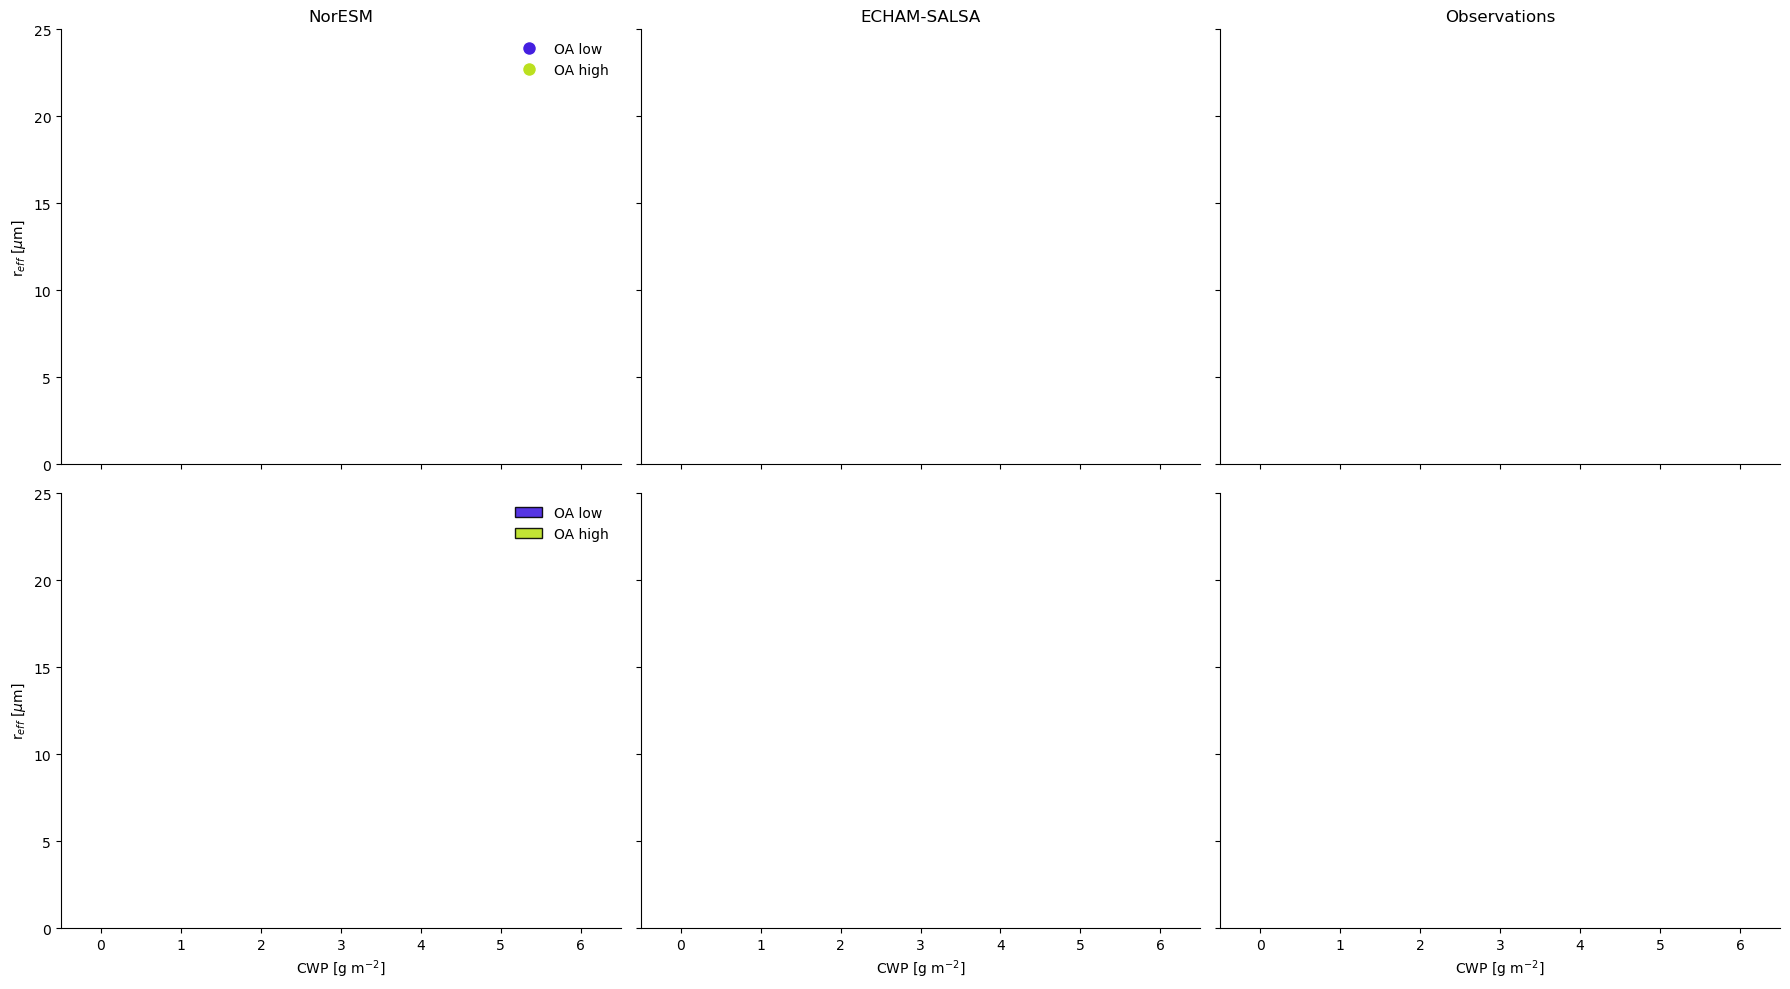

In [90]:
x_var = 'CWP_cut2l'
y_var = 'r_eff'
hue_var = 'OA_category'
hue_labs = ['OA low', 'OA high']
ylim = [0,25]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
#for key,ax in zip(dic_df.keys(), axs[0,:]):

    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

for key,ax in zip(order_keys, axs[1,:]):
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r$_{eff}$ [$\mu$m]')
    
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)
fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

Plots/rel_plot/cloud_props_ATTO_WET_early_boxen_swarm_OA_category_r_eff_CWP_cut2lm.png


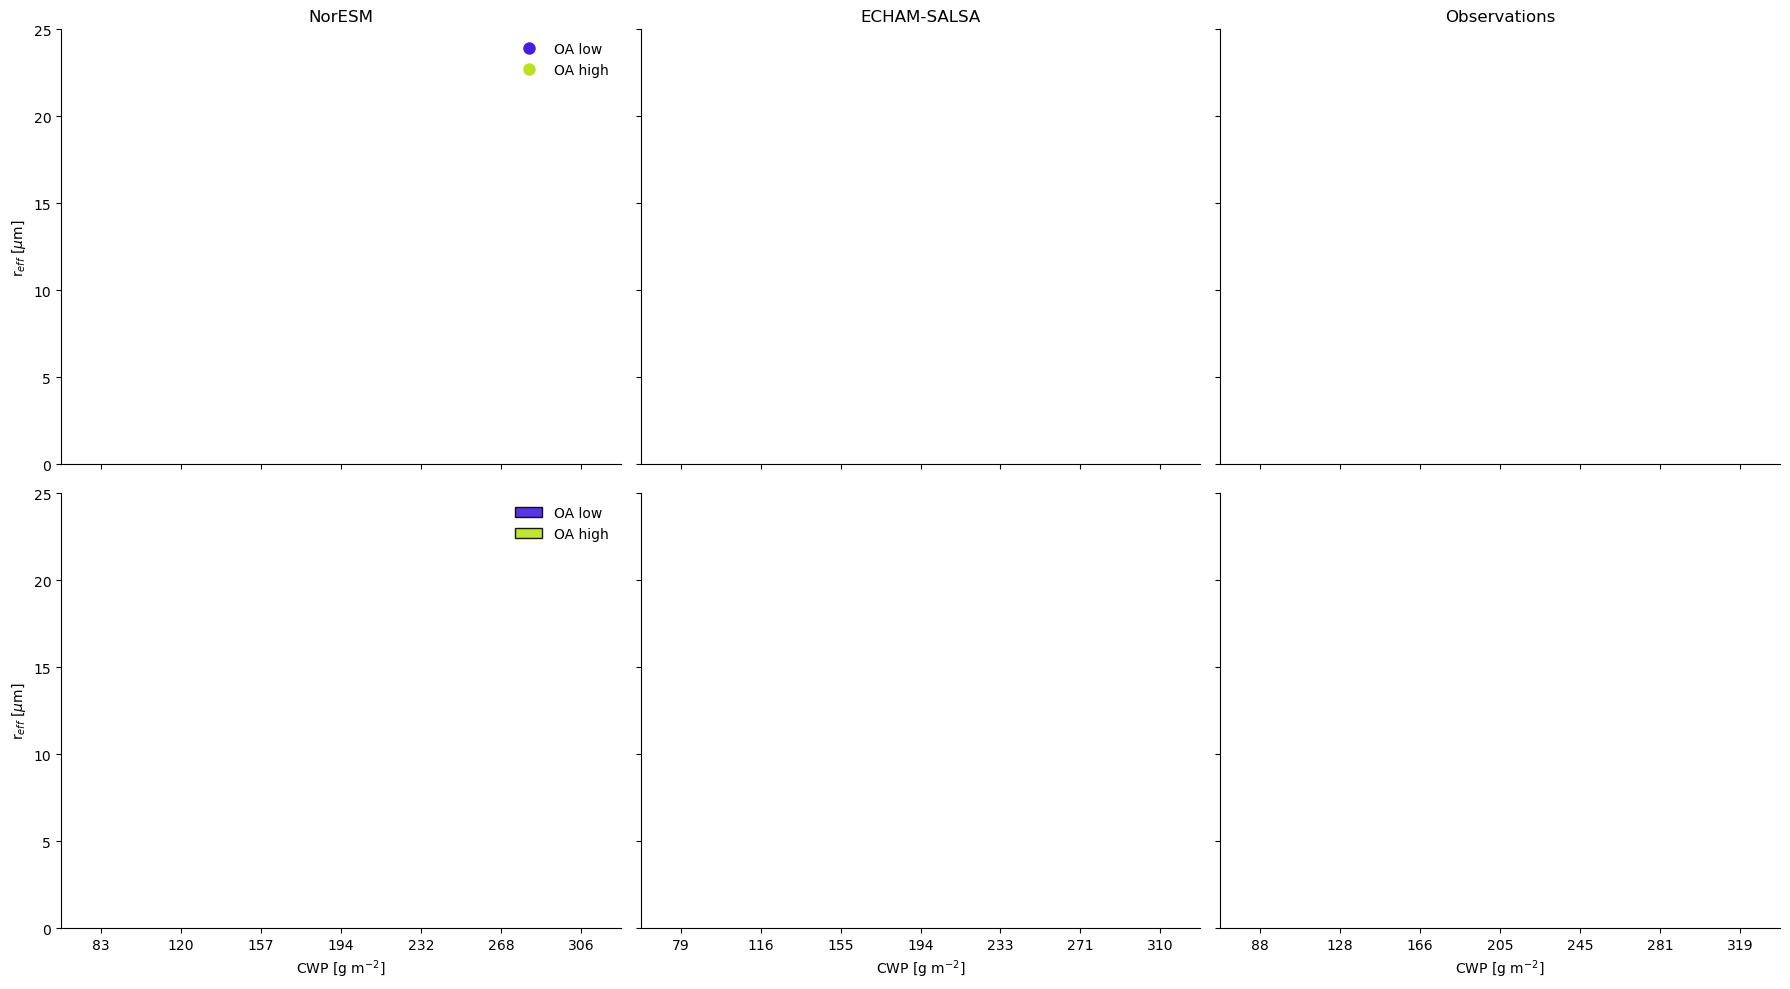

In [91]:
x_var = 'CWP_cut2lm'
y_var = 'r_eff'
hue_var = 'OA_category'
hue_labs = ['OA low', 'OA high']
ylim = [0,25]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
#for key,ax in zip(dic_df.keys(), axs[0,:]):

    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

for key,ax in zip(order_keys, axs[1,:]):
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r$_{eff}$ [$\mu$m]')
    
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)
fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

In [92]:
_df = dic_df[key]

In [93]:
_df.groupby('CWP_cut').count()['OA']

CWP_cut
(60, 100]     852
(100, 140]    753
(140, 180]    640
(180, 220]    511
(220, 260]    359
(260, 300]    235
(300, 340]    137
Name: OA, dtype: int64

In [94]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

## Difference plot

NameError: name 'alpha_err' is not defined

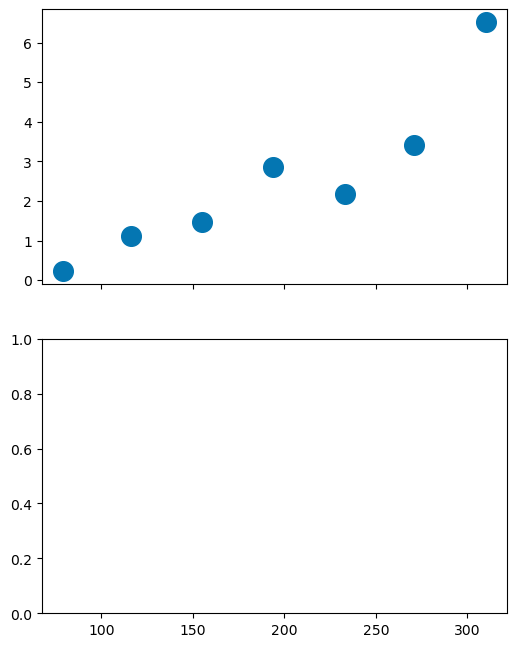

In [95]:
figsize = [6,8]
_palette = palette_OA_2
ylim = None#[0,25]
hue_labs = ['OA low', 'OA high']
hue_var = 'OA_category'

ylim2 = [-4,4]
# fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)

markersize= 2


fig, axs = plt.subplots(2,1,figsize=figsize, sharey='row', sharex='col', dpi=100)


x_var = 'CWP_cut2lm'
y_var1 = 'COT'
y_var2 = 'r_eff'

ylab1 = r'$\Delta $ Cloud optical depth []'
ylab2 = r'$\Delta r_e$ [$\mu$ m]'


ax = axs[0]
for ax, y_var in zip(axs,[y_var1, y_var2]):
    for key in dic_df.keys():
        _df = dic_df[key].copy()
    
        _df_lim =_df.copy() 
        notna = (_df_lim[x_var].notna() & _df_lim[y_var].notna())&(_df_lim[hue_var].notna())
        _df_lim = _df_lim[notna]
        #_df_lim = _df_lim[_df_lim[y_var].notna()]
        #_df_lim = _df_lim[_df_lim[hue_var].notna()]
    
        _df_low = _df_lim[_df_lim[hue_var] == hue_labs[0]]
        _df_high = _df_lim[_df_lim[hue_var] == hue_labs[1]]
    
        med_low = _df_low.groupby(x_var).median()
        med_high = _df_high.groupby(x_var).median()
        std_low = _df_low.groupby(x_var).std()
        std_high = _df_high.groupby(x_var).std()
        n_low = _df_low.groupby(x_var).count()
        n_high = _df_high.groupby(x_var).count()
    
        diff_med = med_high-med_low
        z_alph = 1.96
    
        pm_int = z_alph*np.sqrt((std_low**2/n_low + std_high**2/n_high))
    
        ax.scatter(diff_med.index, diff_med[y_var], c=cdic_model[key], label=key,s=200)
        ax.errorbar(diff_med.index, diff_med[y_var], yerr=pm_int[y_var], c=cdic_model[key], linewidth=0, elinewidth=8, alpha=alpha_err)

for ax in axs:
    ax.axhline(0, c='k')
    
axs[0].set_ylabel(ylab1)
axs[1].set_ylabel(ylab2)
axs[1].set_ylim(ylim2)

axs[1].set_xlabel('CWP [g m$^{-2}$]')

ax.legend(frameon=False)

axs[0].set_title('Difference between high OA and low OA')



sns.despine(fig)
fn = make_fn(hue_var, y_var1,x_var,comment=f'{y_var2}_diff_median', relplot=True)
print(fn) 

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
plt.show()

### Grid box avg

In [ ]:
figsize = [6,8]
_palette = palette_OA_2
ylim = None#[0,25]
hue_labs = ['OA low', 'OA high']
hue_var = 'OA_category'

# fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)

markersize= 2


fig, axs = plt.subplots(2,1,figsize=figsize, sharey='row', sharex='col', dpi=100)


x_var = 'CWP_cutlm'
y_var1 = 'COT'
y_var2 = 'r_eff'

ylab1 = r'$\Delta $ Cloud optical depth []'
ylab2 = r'$\Delta r_e$ [$\mu$ m]'


ax = axs[0]
for ax, y_var in zip(axs,[y_var1, y_var2]):
    for key in dic_df.keys():
        _df = dic_df[key].copy()
    
        _df_lim =_df.copy() 
        notna = (_df_lim[x_var].notna() & _df_lim[y_var].notna())&(_df_lim[hue_var].notna())
        _df_lim = _df_lim[notna]
        #_df_lim = _df_lim[_df_lim[y_var].notna()]
        #_df_lim = _df_lim[_df_lim[hue_var].notna()]
    
        _df_low = _df_lim[_df_lim[hue_var] == hue_labs[0]]
        _df_high = _df_lim[_df_lim[hue_var] == hue_labs[1]]
    
        med_low = _df_low.groupby(x_var).median()
        med_high = _df_high.groupby(x_var).median()
        std_low = _df_low.groupby(x_var).std()
        std_high = _df_high.groupby(x_var).std()
        n_low = _df_low.groupby(x_var).count()
        n_high = _df_high.groupby(x_var).count()
    
        diff_med = med_high-med_low
        z_alph = 1.96
    
        pm_int = z_alph*np.sqrt((std_low**2/n_low + std_high**2/n_high))
    
        ax.scatter(diff_med.index, diff_med[y_var], c=cdic_model[key], label=key,s=200)
        ax.errorbar(diff_med.index, diff_med[y_var], yerr=pm_int[y_var], c=cdic_model[key], linewidth=0, elinewidth=8, alpha=alpha_err)

for ax in axs:
    ax.axhline(0, c='k')
    
axs[0].set_ylabel(ylab1)
axs[1].set_ylabel(ylab2)

axs[1].set_xlabel('CWP [g m$^{-2}$]')

ax.legend(frameon=False)

axs[0].set_title('Difference between high OA and low OA')



sns.despine(fig)
fn = make_fn(hue_var, y_var1,x_var,comment=f'{y_var2}_diff_median', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
plt.show()

### Grid box avg

In [ ]:
figsize = [6,8]
_palette = palette_OA_2
ylims =[None, [-3,3]]
hue_labs = ['OA low', 'OA high']
hue_var = 'OA_category'

# fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)

markersize= 2


fig, axs = plt.subplots(2,1,figsize=figsize, sharey='row', sharex='col', dpi=100)


x_var = 'CWP_cut2l'
y_var1 = 'COT'
y_var2 = 'r_eff'

ylab1 = r'$\Delta $ Cloud optical depth []'
ylab2 = r'$\Delta r_e$ [$\mu$ m]'


ax = axs[0]
for ax, y_var,ylim in zip(axs,[y_var1, y_var2], ylims):
    for key in dic_df.keys():
        _df = dic_df[key].copy()
    
        _df_lim =_df.copy() 
        notna = (_df_lim[x_var].notna() & _df_lim[y_var].notna())&(_df_lim[hue_var].notna())
        _df_lim = _df_lim[notna]
        #_df_lim = _df_lim[_df_lim[y_var].notna()]
        #_df_lim = _df_lim[_df_lim[hue_var].notna()]
    
        _df_low = _df_lim[_df_lim[hue_var] == hue_labs[0]]
        _df_high = _df_lim[_df_lim[hue_var] == hue_labs[1]]
    
        med_low = _df_low.groupby(x_var).median()
        med_high = _df_high.groupby(x_var).median()
        std_low = _df_low.groupby(x_var).std()
        std_high = _df_high.groupby(x_var).std()
        n_low = _df_low.groupby(x_var).count()
        n_high = _df_high.groupby(x_var).count()
    
        diff_med = med_high-med_low
        z_alph = 1.96
    
        pm_int = z_alph*np.sqrt((std_low**2/n_low + std_high**2/n_high))
    
        ax.scatter(diff_med.index, diff_med[y_var], c=cdic_model[key], label=key,s=200)
        ax.errorbar(diff_med.index, diff_med[y_var], yerr=pm_int[y_var], c=cdic_model[key], linewidth=0, elinewidth=8, alpha=alpha_err)
    ax.set_ylim(ylim)
for ax in axs:
    ax.axhline(0, c='k')
    
axs[0].set_ylabel(ylab1)
axs[1].set_ylabel(ylab2)

axs[1].set_xlabel('CWP bin [-]')

ax.legend(frameon=False)

axs[0].set_title('Difference between high OA and low OA')



sns.despine(fig)
fn = make_fn(hue_var, y_var1,x_var,comment=f'{y_var2}_diff_median', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
plt.show()

### Grid box avg

In [ ]:
plt.scatter(diff_med.index, diff_med[y_var], )
plt.errorbar(diff_med.index, diff_med[y_var], yerr=pm_int[y_var])

In [ ]:
pm_int

In [ ]:
sns.scatterplot(x = 'COT', y='CWP', data = _df)
plt.xlim([0,55])
plt.ylim([0,500])

In [ ]:
_dft = _df[ _df['CWP_cutl'] ==185]

In [ ]:
_dft.plot.scatter(x='COT', y='OA')